In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Summary Statistics

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Observations :-
    
1. The mean is more than median for months_as_customer, age, policy_number, policy_deductable, umbrella_limit, insured_zip,
capital-gains, number_of_vehicles_involved, witnesses, injury_claim, property_claim and auto_year.

2. There is large difference between 75 % and maximum for policy_number, capital-gains, insured_zip, total_claim_amount	,
injury_claim, property_claim and vehicle_claim.

# Exploring Target Variable

In [8]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

# Univariate Analysis

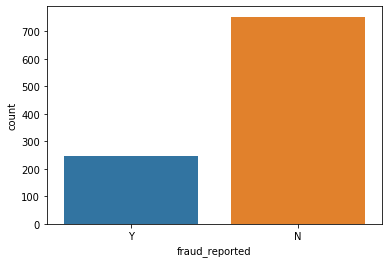

In [9]:
sns.countplot(df['fraud_reported'])

# Data Visualizations

To check missing values

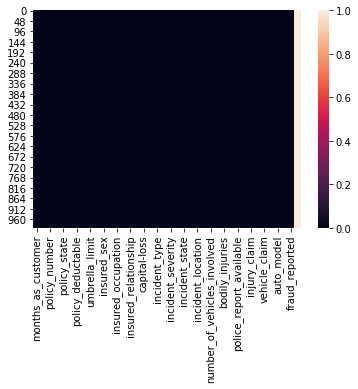

In [10]:
sns.heatmap(df.isnull())

Obsevations :-

1. The data has no missing values.

# Univariate Analysis

In [11]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [12]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [13]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [14]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)

In [15]:
df_str_types.remove('incident_date')

In [16]:
df_str_types.remove('policy_bind_date')

In [17]:
df_str_types.remove('incident_location')

In [18]:
df_str_types.remove('fraud_reported')

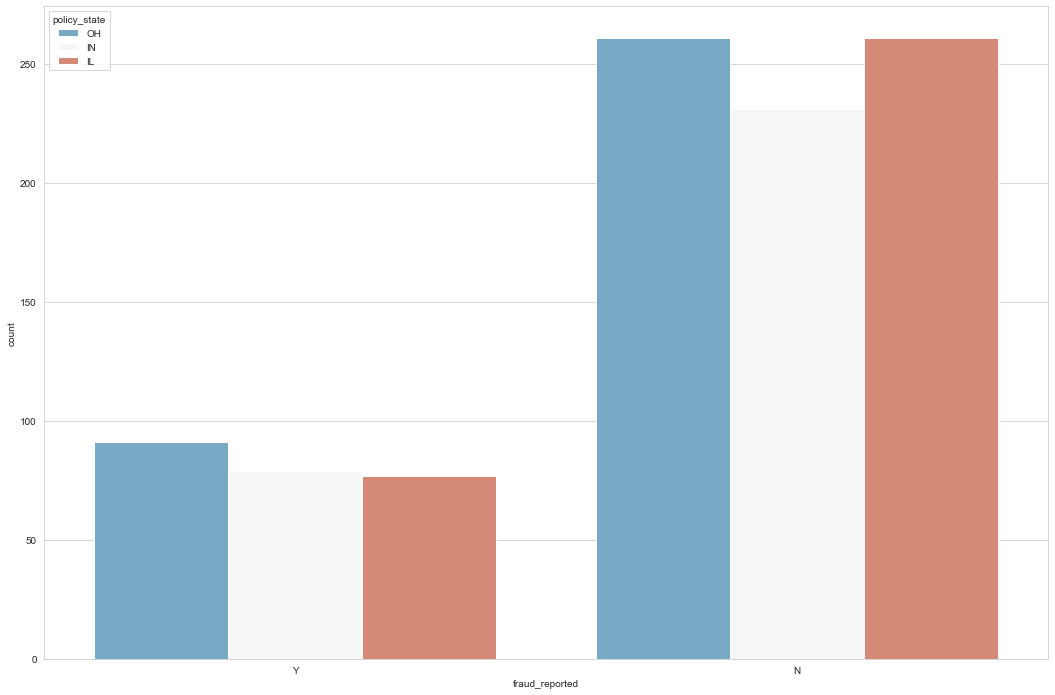

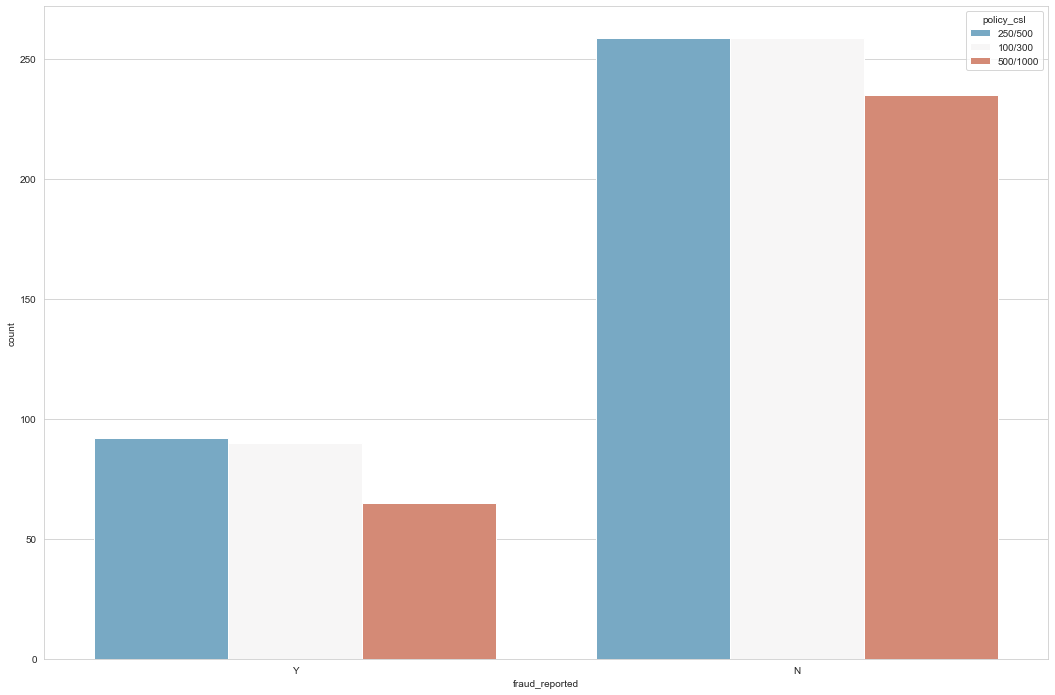

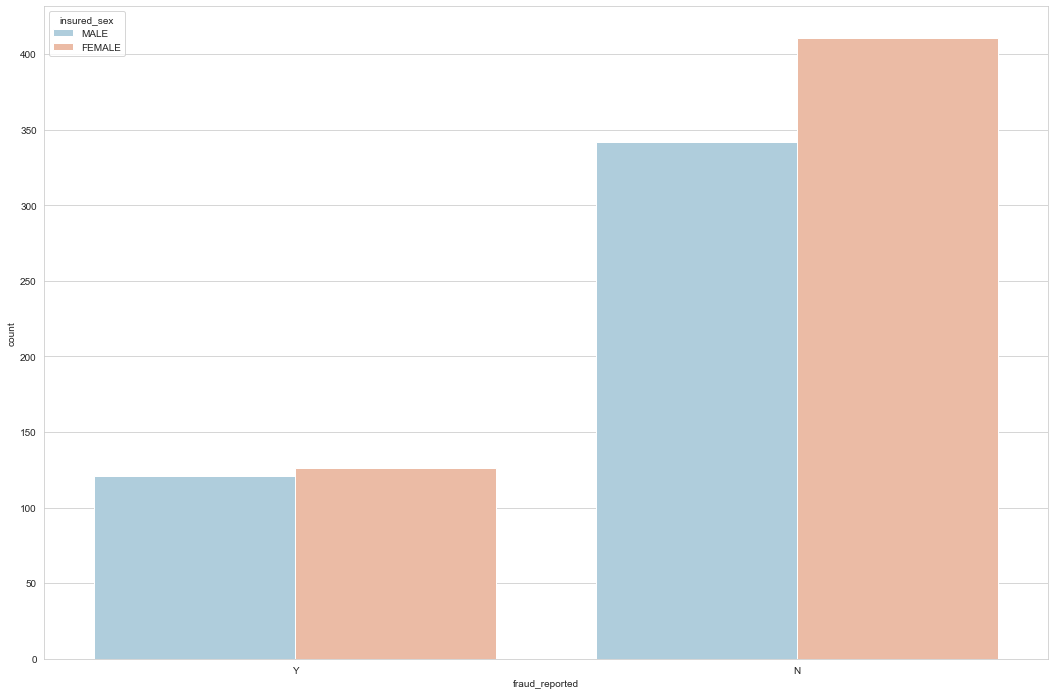

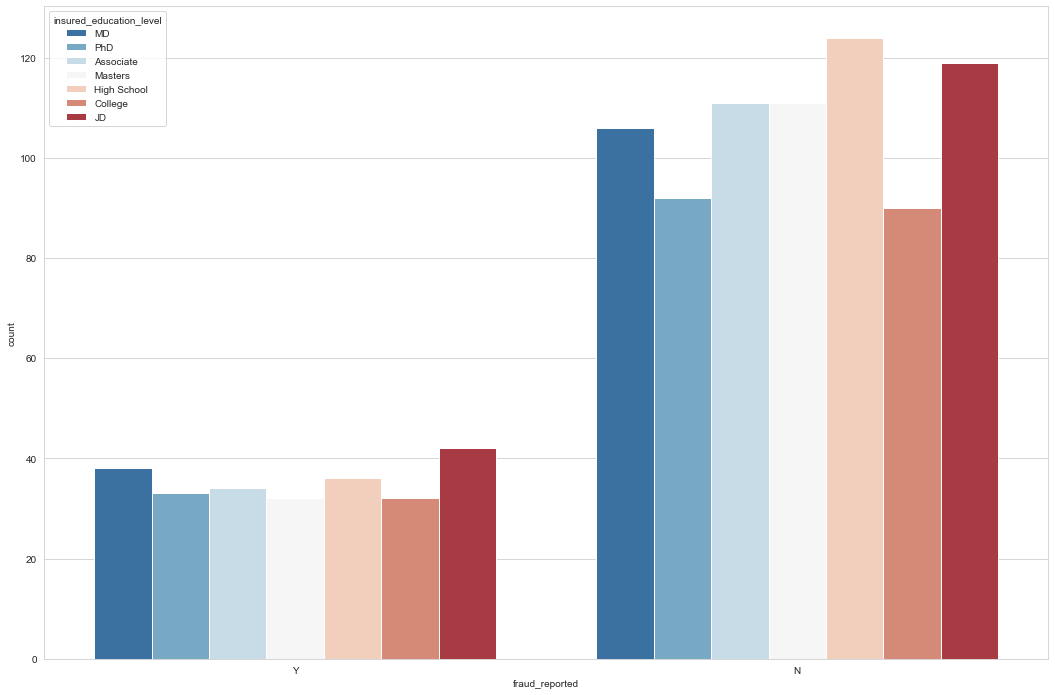

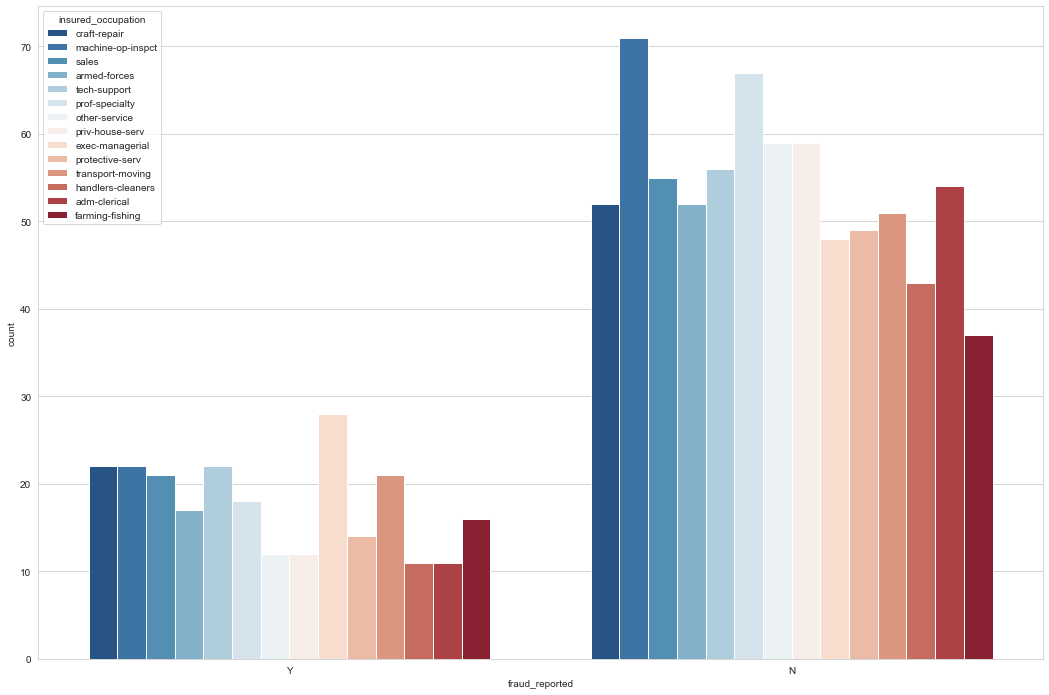

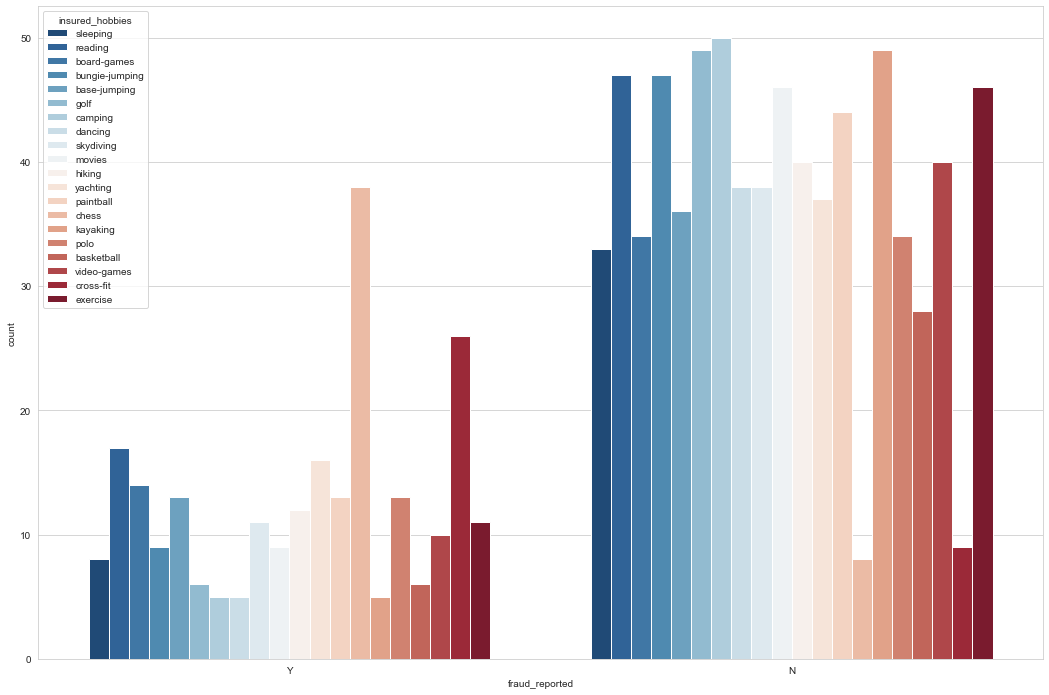

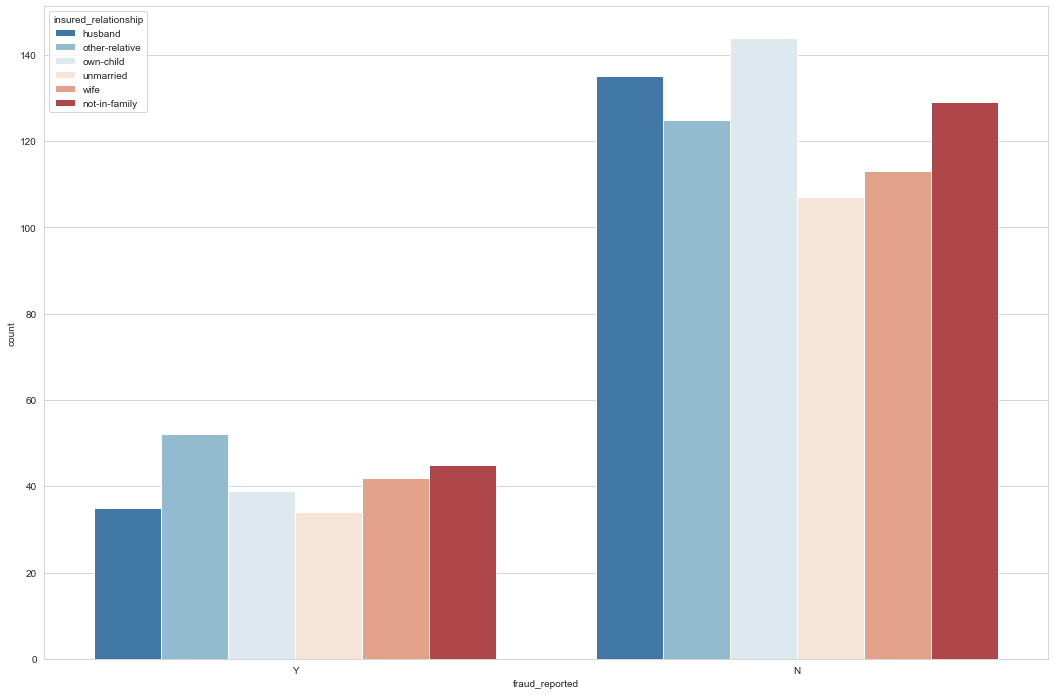

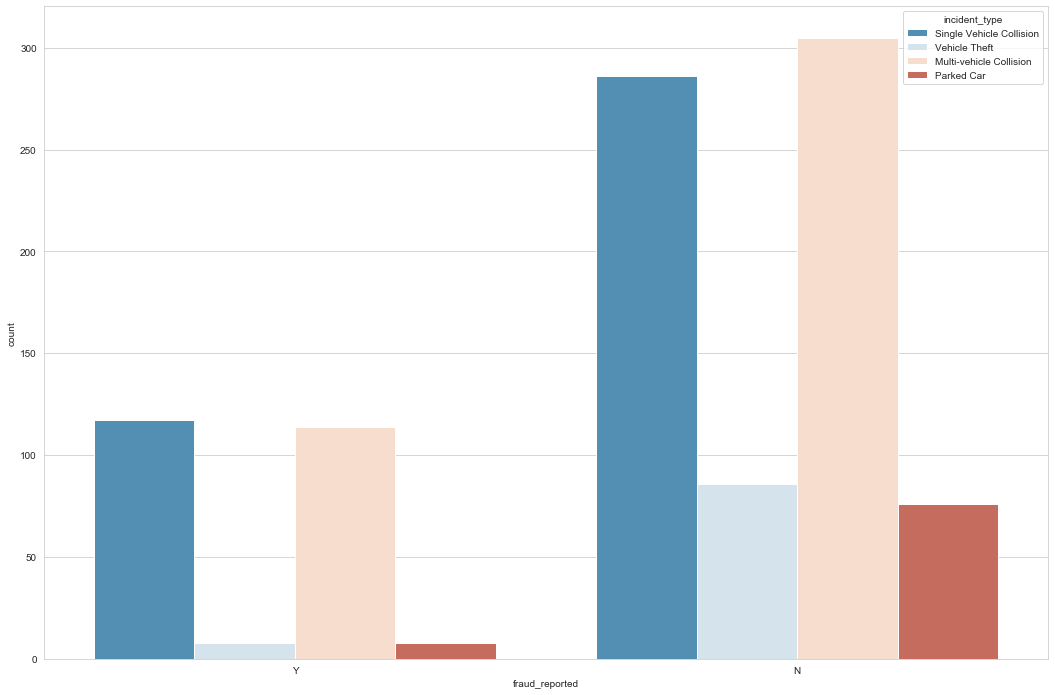

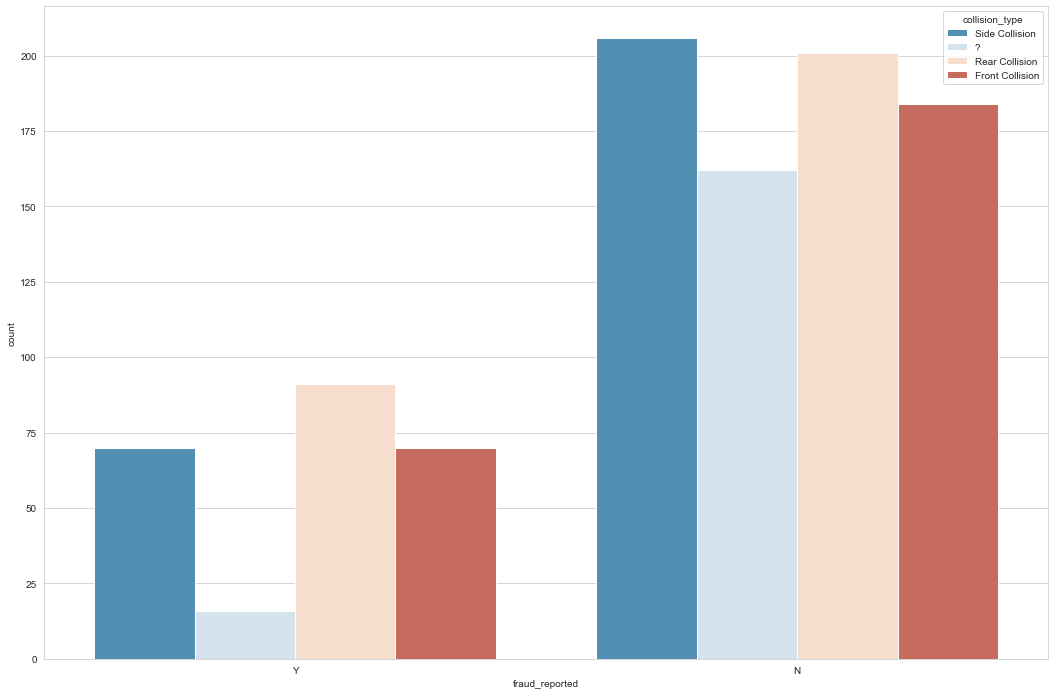

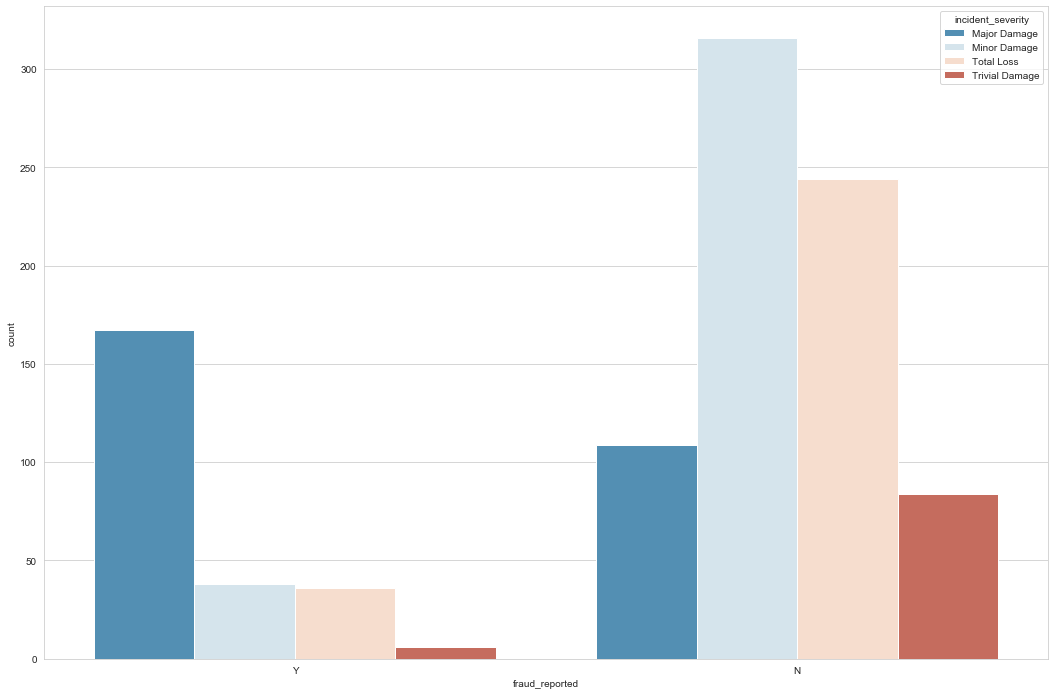

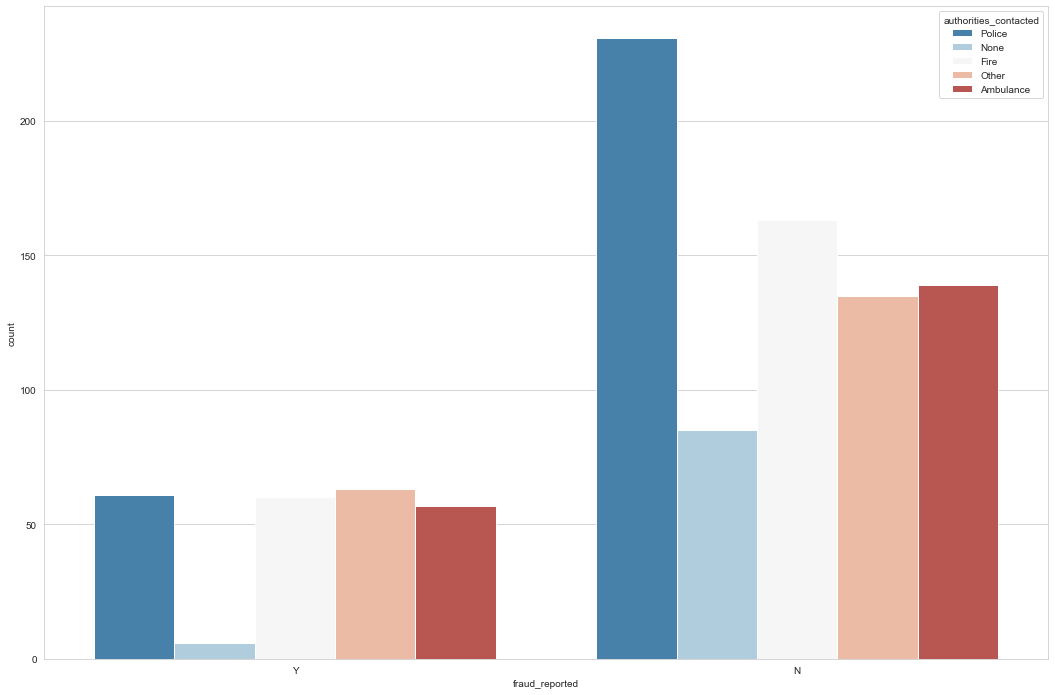

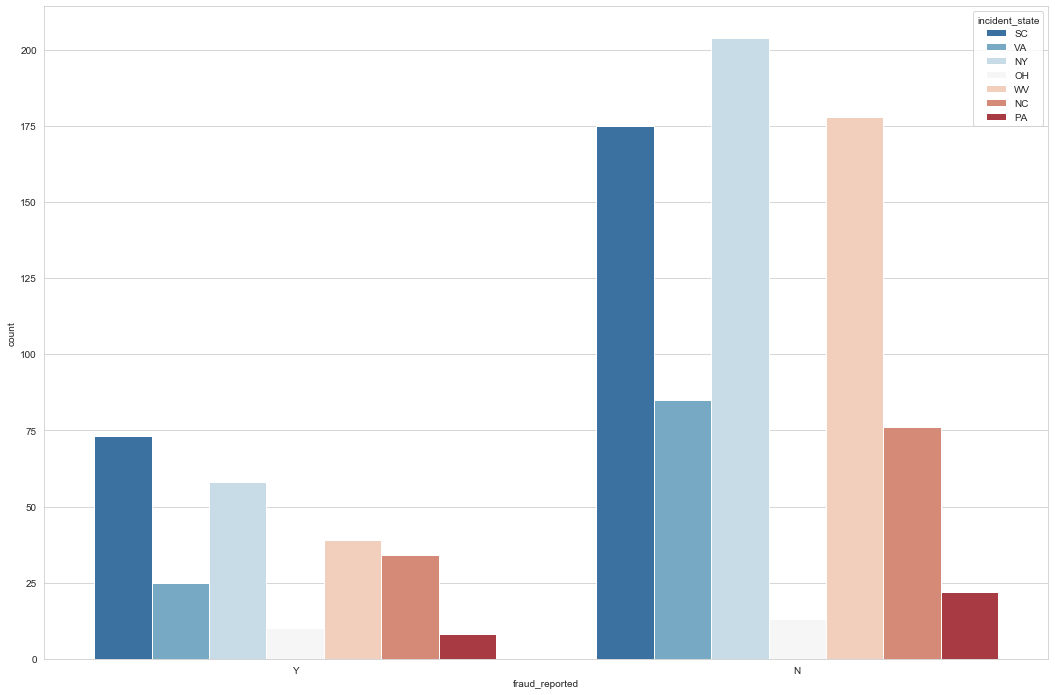

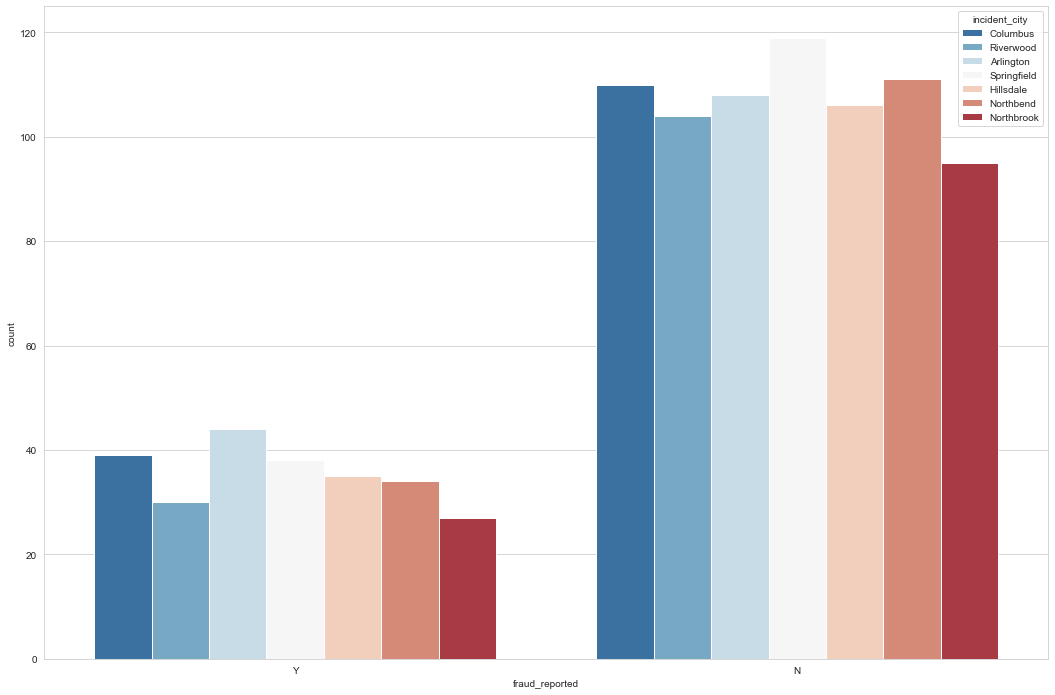

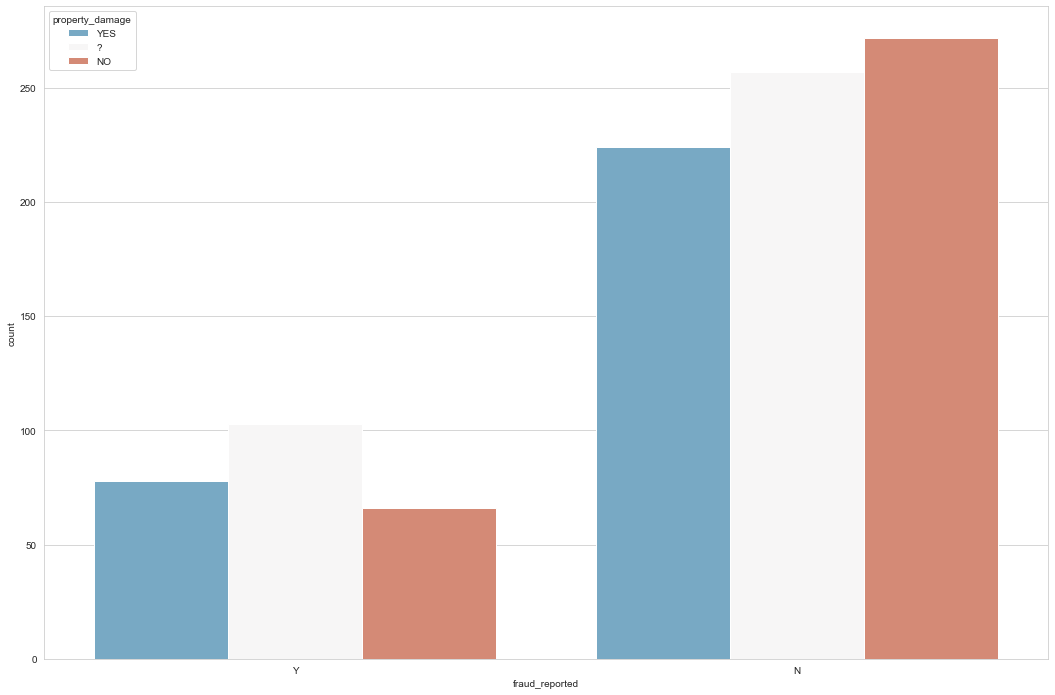

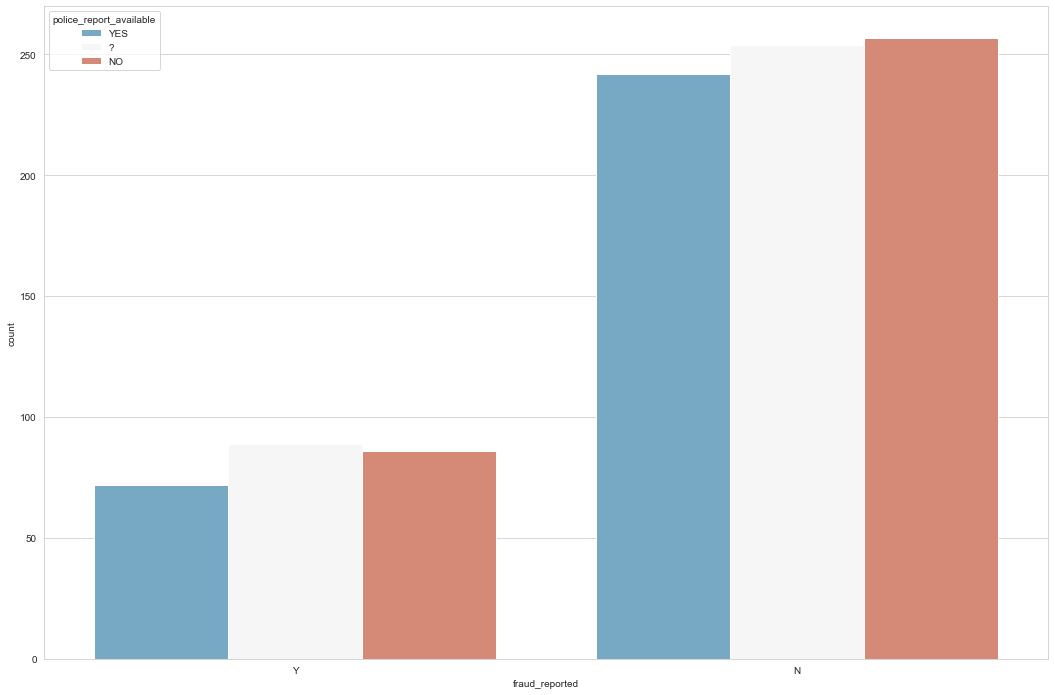

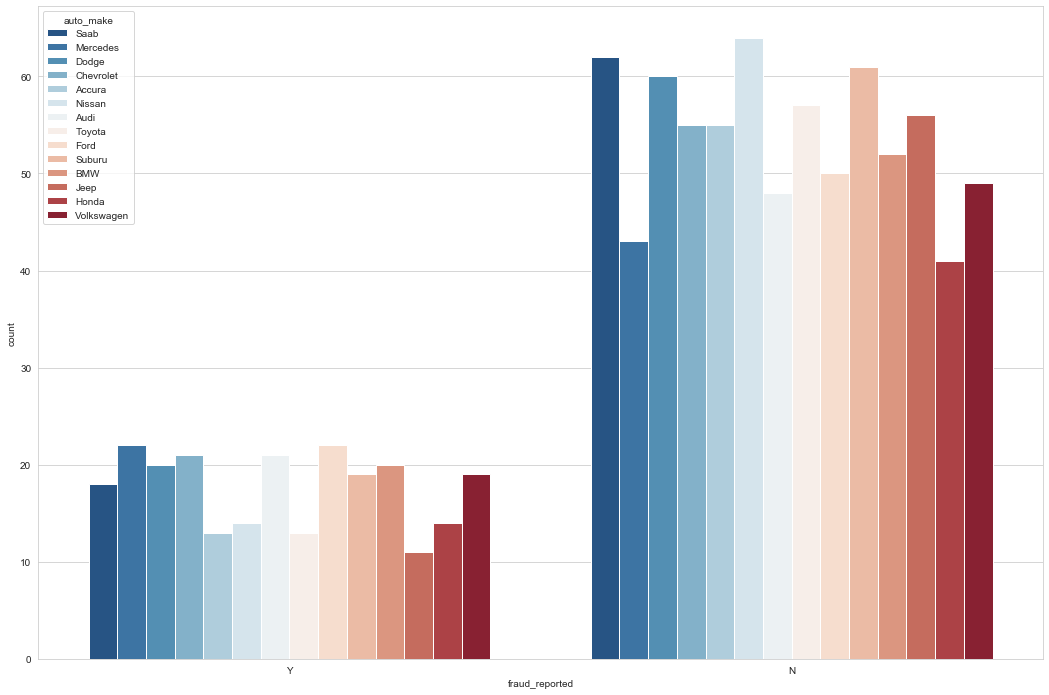

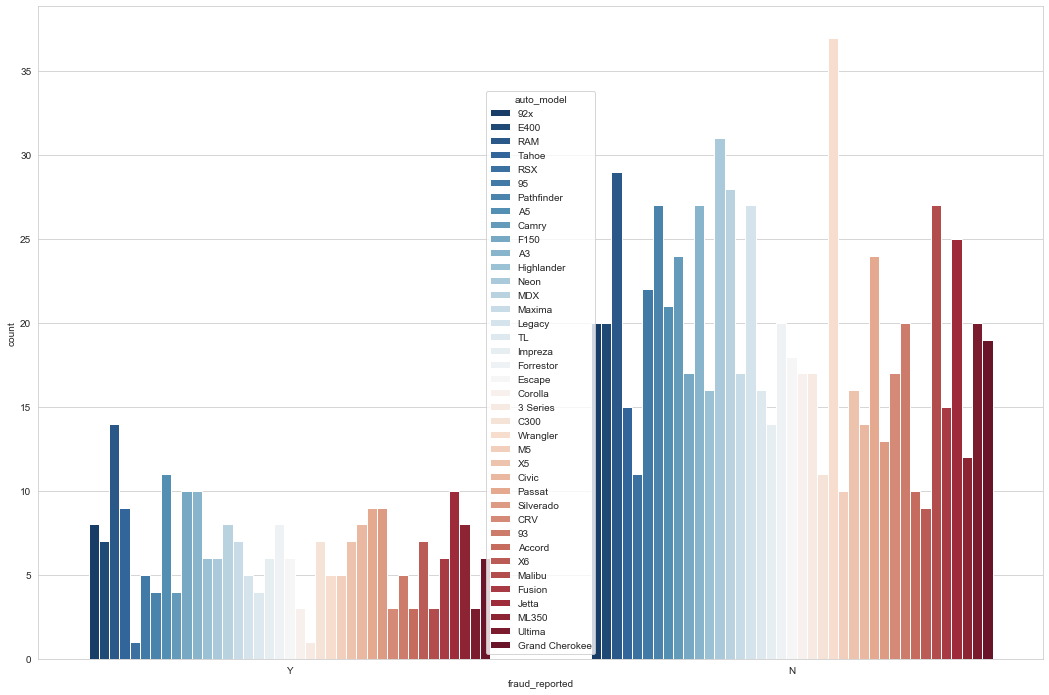

In [19]:
for i in df_str_types:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.countplot(x='fraud_reported',hue=i,data=df,palette='RdBu_r')
    plt.show()

In [20]:
df['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [21]:
df.drop('incident_location',axis=1,inplace=True)

In [22]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
24-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
31-01-2015    20
06-02-2015    20
22-02-2015    20
21-01-2015    19
01-01-2015    19
12-01-2015    19
14-01-2015    19
23-02-2015    19
21-02-2015    19
14-02-2015    18
01-02-2015    18
20-01-2015    18
25-02-2015    18
03-01-2015    18
18-01-2015    18
28-02-2015    18
09-01-2015    17
26-02-2015    17
06-01-2015    17
24-02-2015    17
08-02-2015    17
13-02-2015    16
16-01-2015    16
16-02-2015    16
15-02-2015    16
05-02-2015    16
17-01-2015    15
28-01-2015    15
18-02-2015    15
15-01-2015    15
22-01-2015    14
27-02-2015    14
20-02-2015    14
03-02-2015    13
27-01-2015    13
23-01-2015    13
09-02-2015    13
01-03-2015    12
04-01-2015    12
29-01-2015    11
26-01-2015    11
02-01-2015    11
25-01-2015    10
10-02-2015    10
11-02-2015    10
07-02-2015    10
19-02-2015    10
11-01-2015    

In [23]:
df['incident_year']=df['incident_date'].str.split('-').str[2]
df['policy_bind_year']=df['policy_bind_date'].str.split('-').str[2]

In [24]:
df['incident_day']=df['incident_date'].str.split('-').str[0]
df['policy_bind_day']=df['policy_bind_date'].str.split('-').str[0]

In [25]:
df['incident_month']=df['incident_date'].str.split('-').str[1]
df['policy_bind_month']=df['policy_bind_date'].str.split('-').str[1]

In [26]:
df.drop(['incident_date','policy_bind_date'],axis=1,inplace=True)

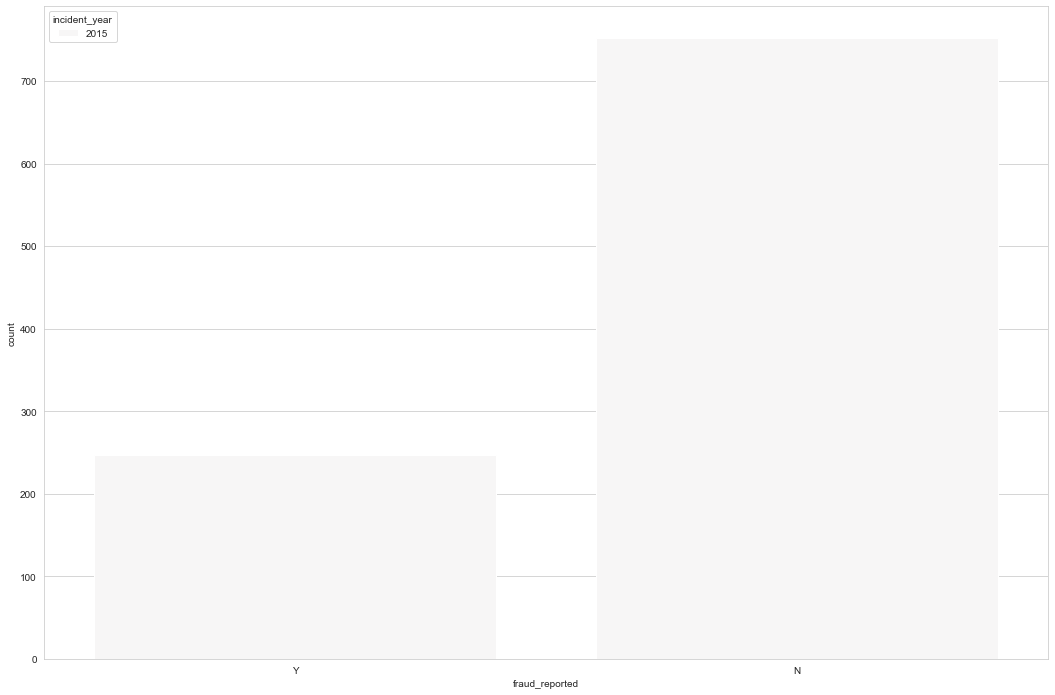

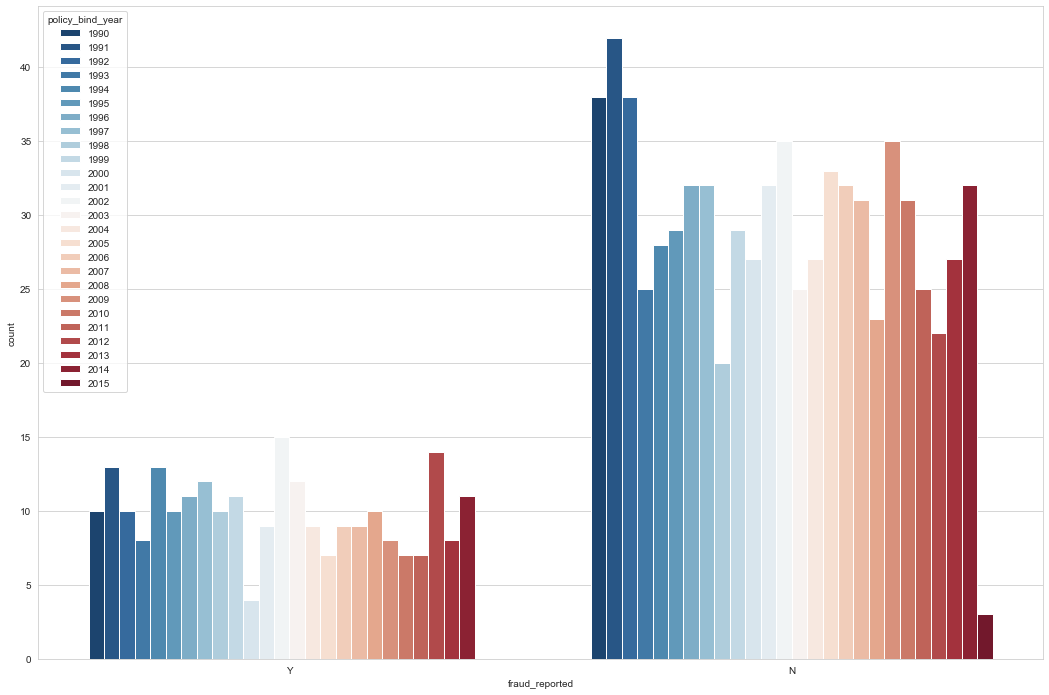

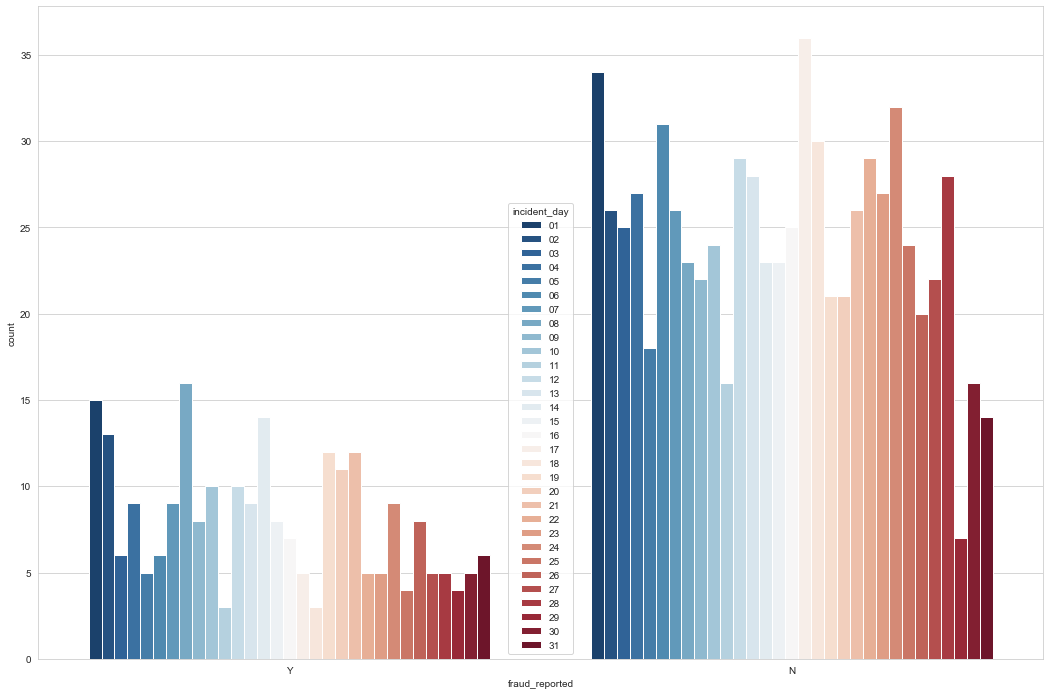

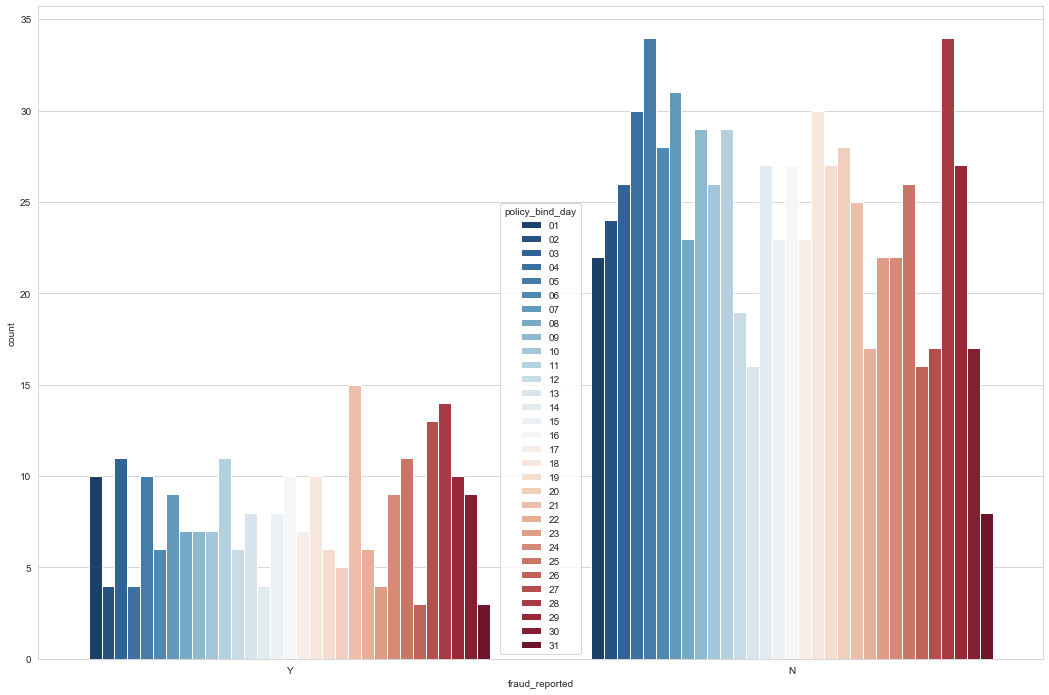

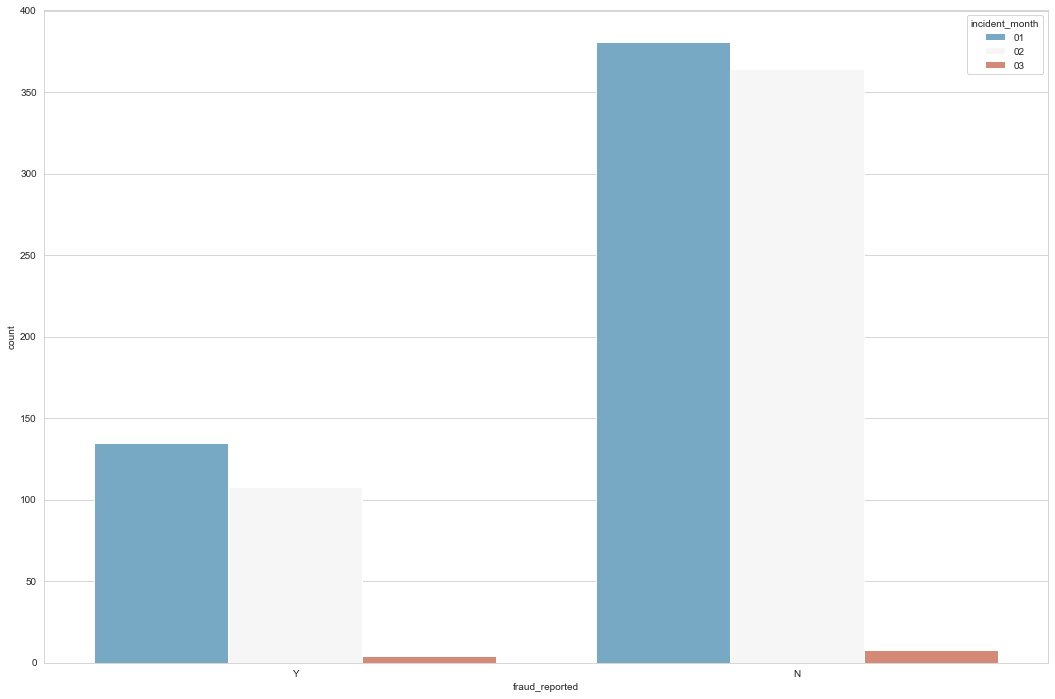

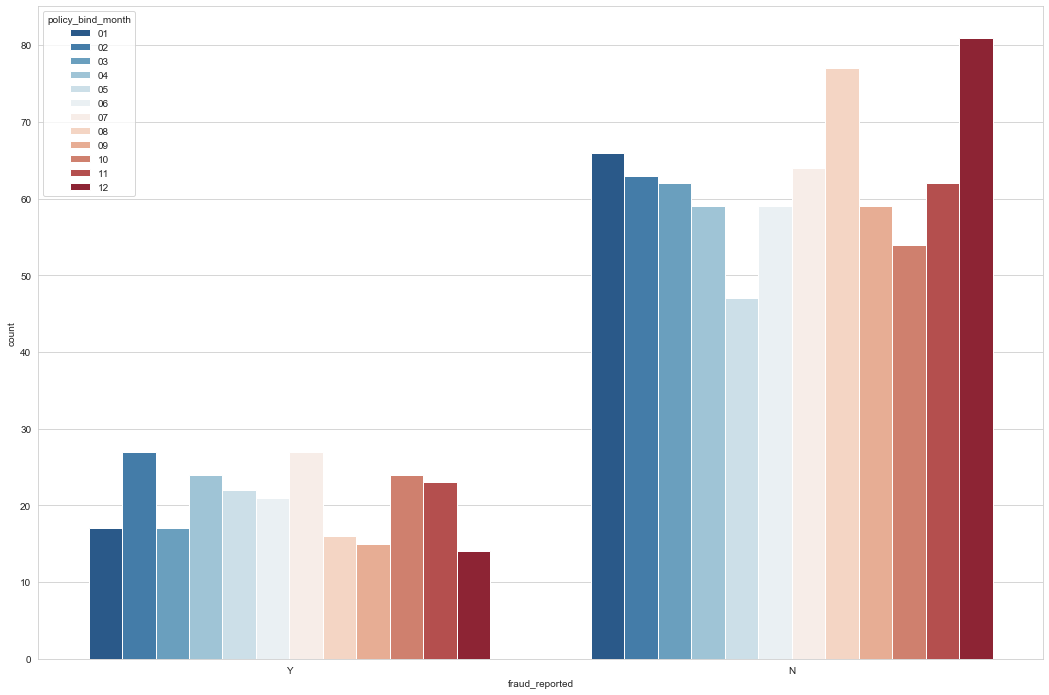

In [27]:
list=['incident_year','policy_bind_year','incident_day','policy_bind_day', 'incident_month', 'policy_bind_month']
for i in list:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.countplot(x='fraud_reported',hue=i,data=df,palette='RdBu_r')
    plt.show()   

In [28]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64" or "float64":
        df_int_types.append(i)

In [29]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_model,auto_year,fraud_reported,_c39,incident_year,policy_bind_year,incident_day,policy_bind_day,incident_month,policy_bind_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,92x,2004,Y,NaN,2015,2014,25,17,01,10
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,E400,2007,Y,NaN,2015,2006,21,27,01,06
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,RAM,2007,N,NaN,2015,2000,22,06,02,09
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Tahoe,2014,Y,NaN,2015,1990,10,25,01,05
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,RSX,2009,N,NaN,2015,2014,17,06,02,06


In [30]:
df_int_types

['months_as_customer',
 'age',
 'policy_number',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39',
 'incident_year',
 'policy_bind_year',
 'incident_day',
 'policy_bind_day',
 'incident_month',
 'policy_bind_month']

In [31]:
df_int_types.remove('incident_year')

In [32]:
df_int_types.remove('policy_bind_year')

In [33]:
df_int_types.remove('incident_day')

In [34]:
df_int_types.remove('policy_bind_day')

In [35]:
df_int_types.remove('incident_month')

In [36]:
df_int_types.remove('policy_bind_month')

In [37]:
for i in df_int_types:
    print(df[i].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64
1374.22    2
15

In [38]:
df_dist_plot_int_list=['property_claim','injury_claim','total_claim_amount','capital-loss','capital-gains','insured_zip',
                      'policy_annual_premium','policy_number','months_as_customer','vehicle_claim']

In [39]:
df_count_plot_int_list=['police_report_available',
'witnesses',
'bodily_injuries',
'property_damage',
'number_of_vehicles_involved',
'incident_hour_of_the_day',
'incident_city',
'incident_state',
'authorities_contacted',
'incident_severity',
'collision_type',
'incident_type',
'insured_relationship',
'insured_hobbies',
'insured_occupation',
'insured_education_level',
'insured_sex',
'umbrella_limit',
'policy_deductable',
'policy_csl',
'policy_state',
'age',
'auto_year',
'auto_model',
'auto_make']

for i in df_count_plot_int_list:
    print(df[i].value_counts())

df_le=['police_report_available','property_damage','incident_city','incident_state','authorities_contacted','incident_severity',
'collision_type','incident_type',
'insured_relationship','insured_hobbies','insured_occupation',
'insured_education_level',
'insured_sex','policy_csl',
'policy_state','auto_model',
'auto_make']

df_str_types

df_all_l=df_le+df_str_types

df_all_l

len(df_all_l)

from sklearn.preprocessing import LabelEncoder

for i in df_all_l:
    LE=LabelEncoder()
    print(df[i].value_counts().sort_index())
    df[i]=LE.fit_transform(df[i])
    print(df[i].value_counts().sort_index())

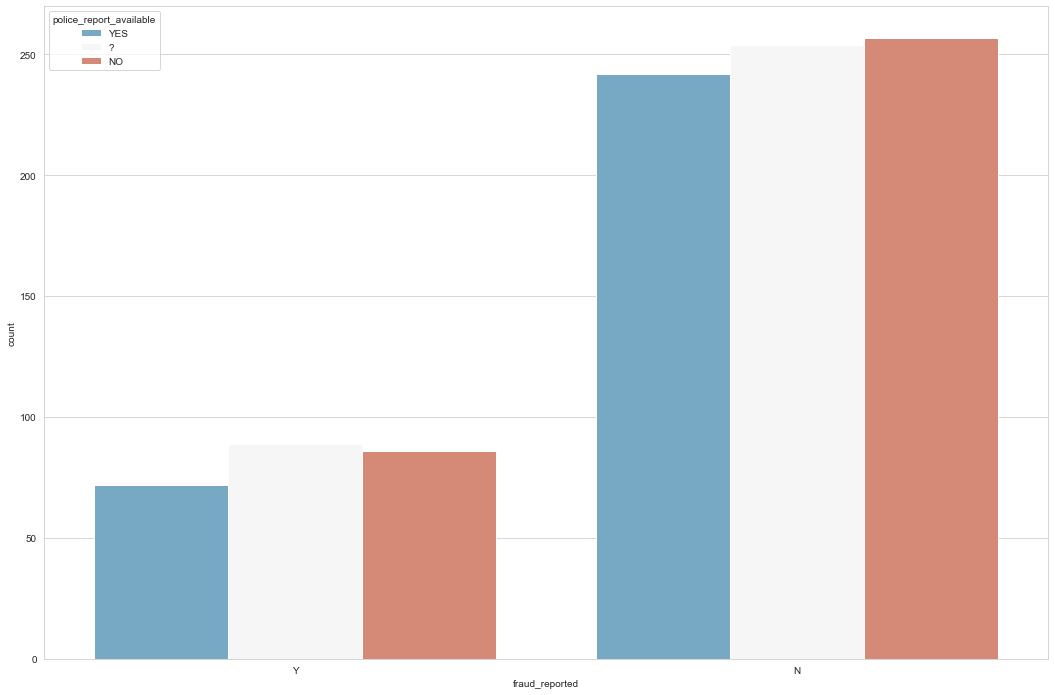

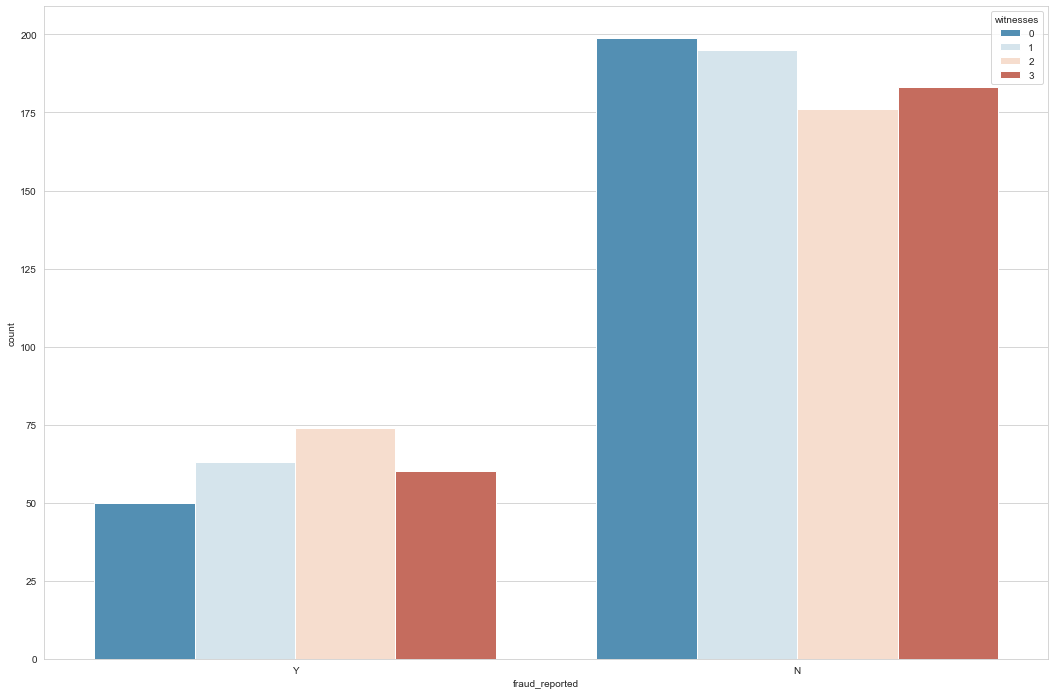

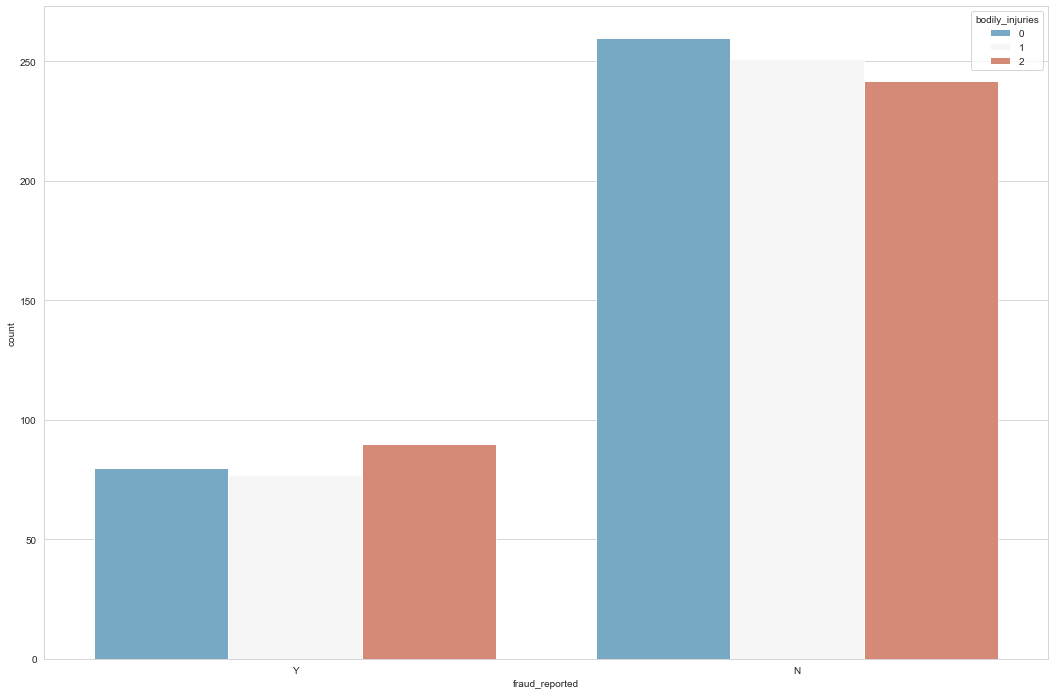

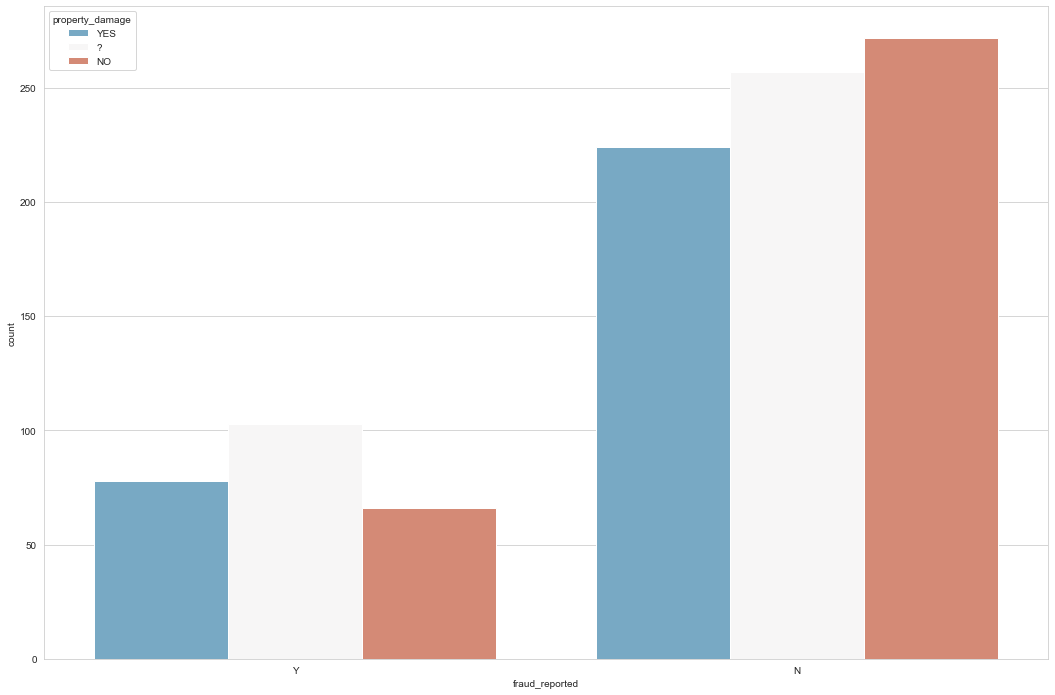

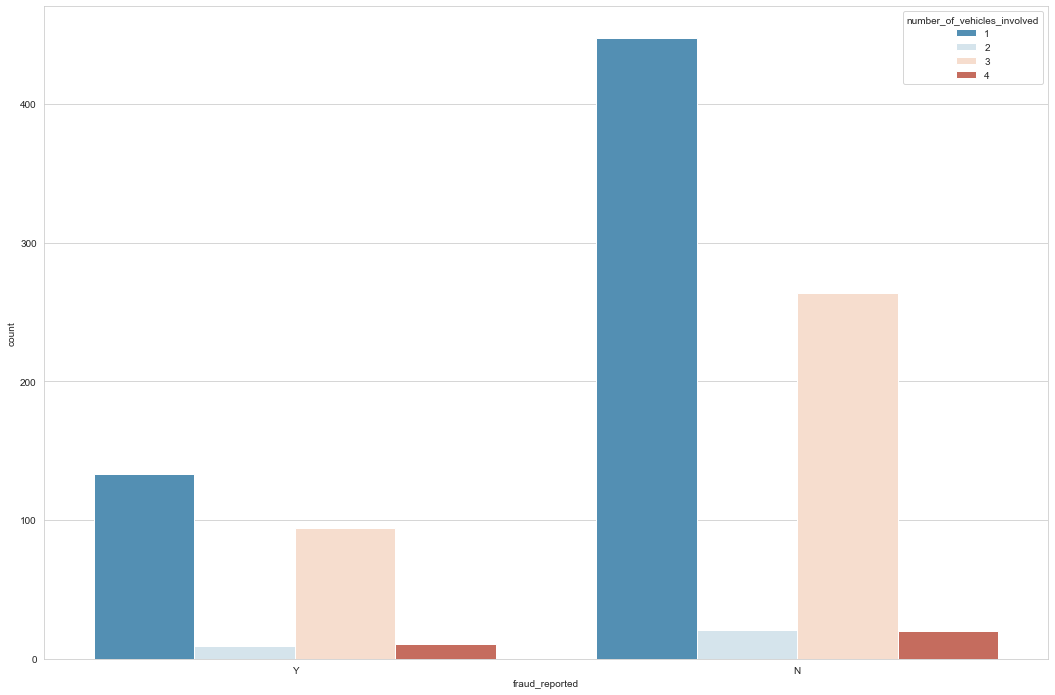

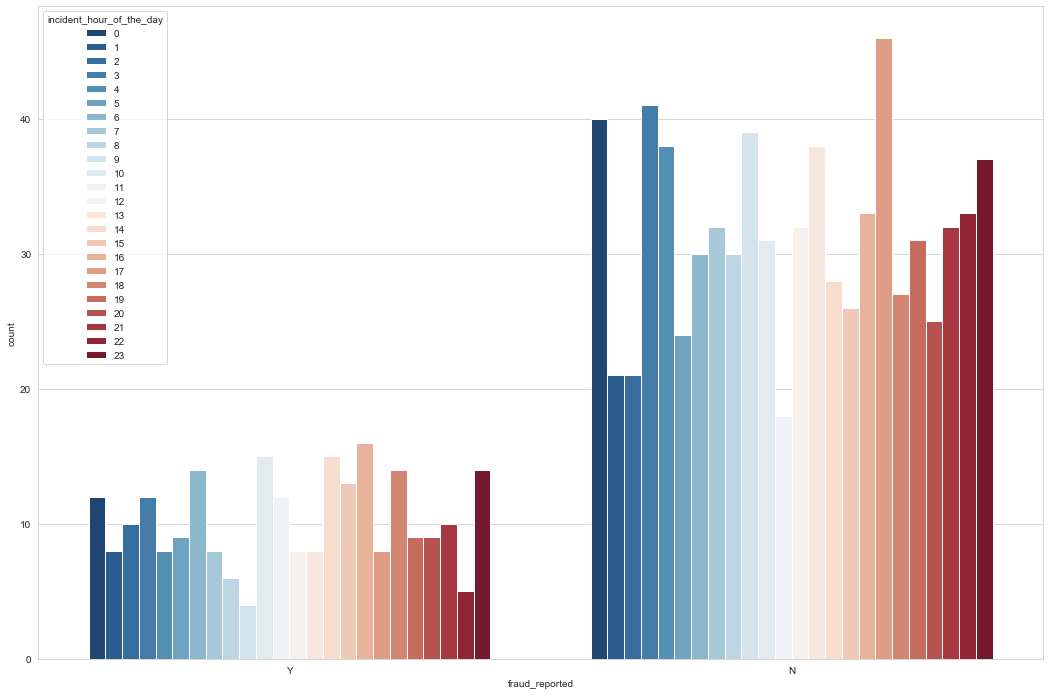

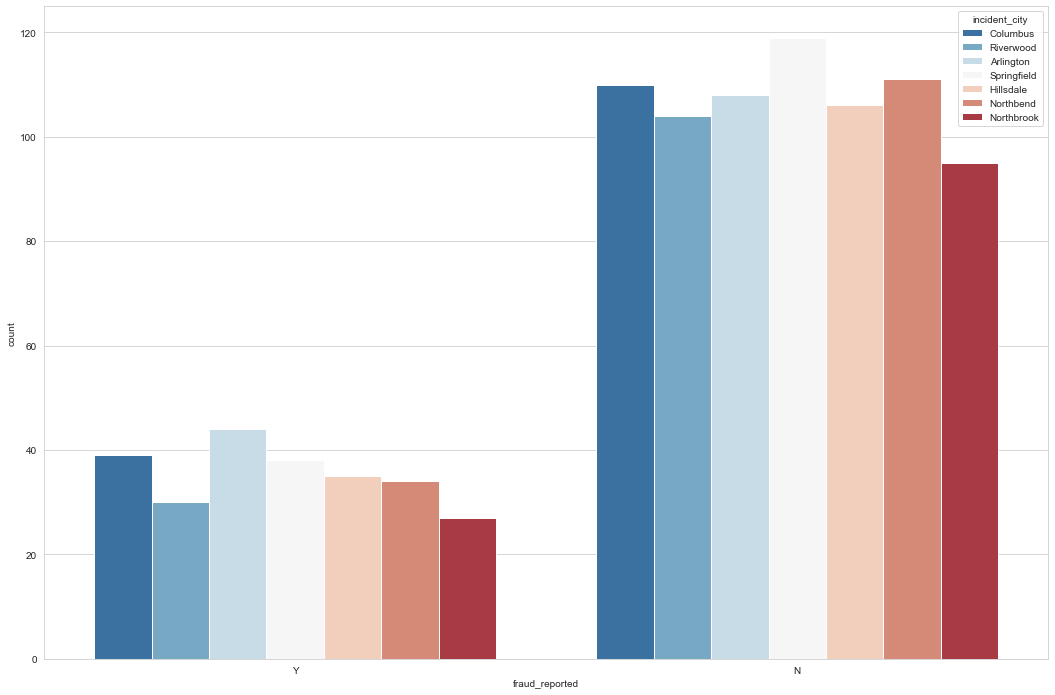

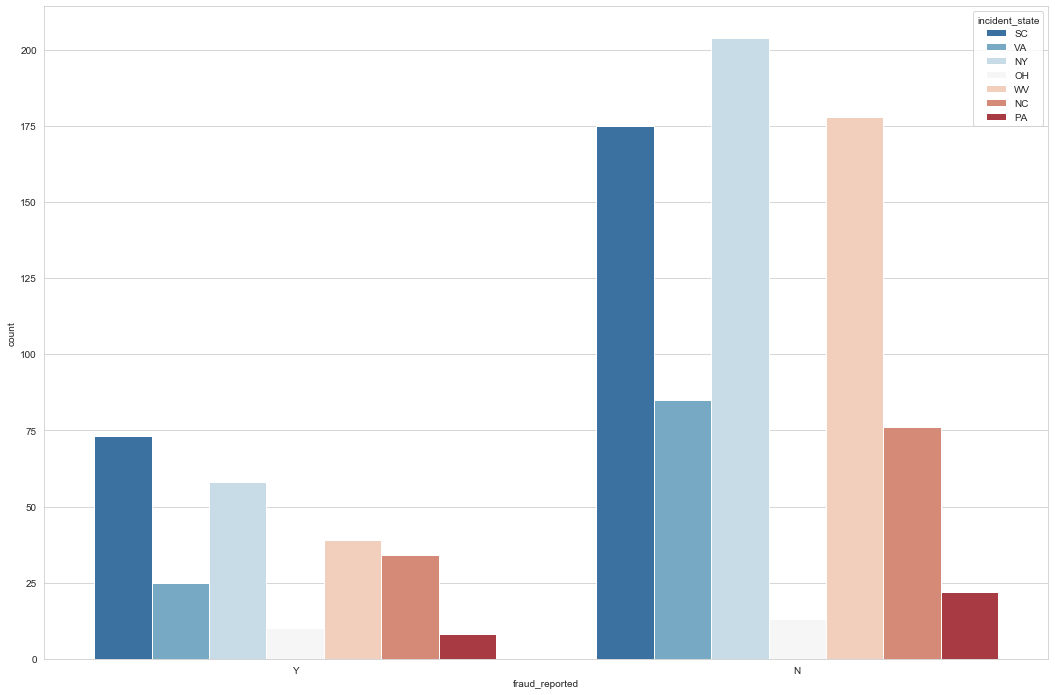

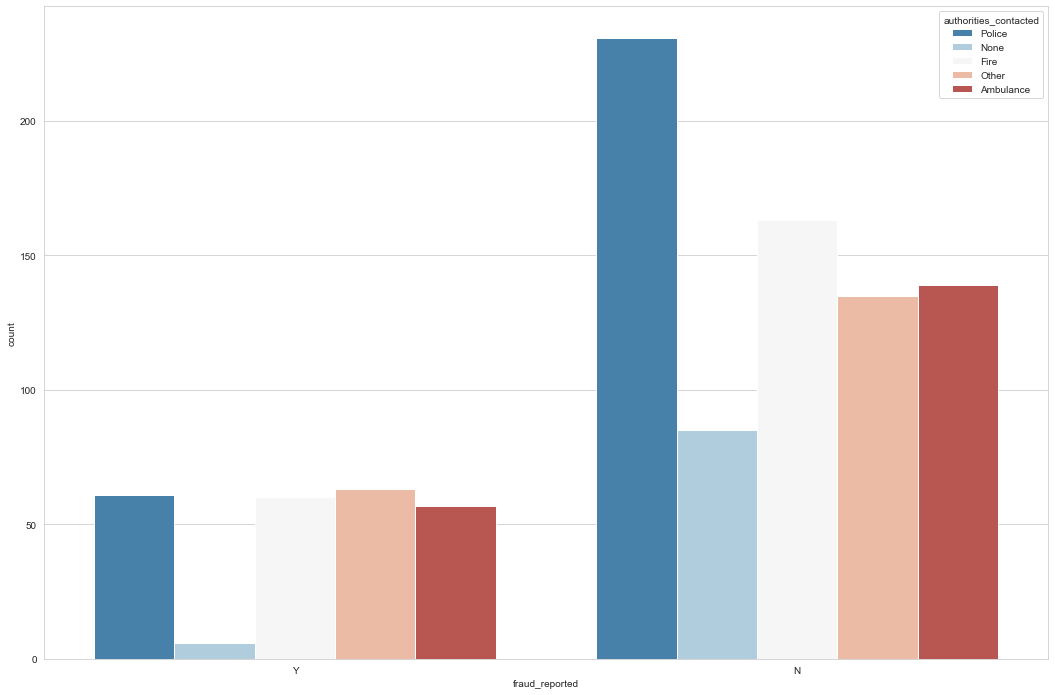

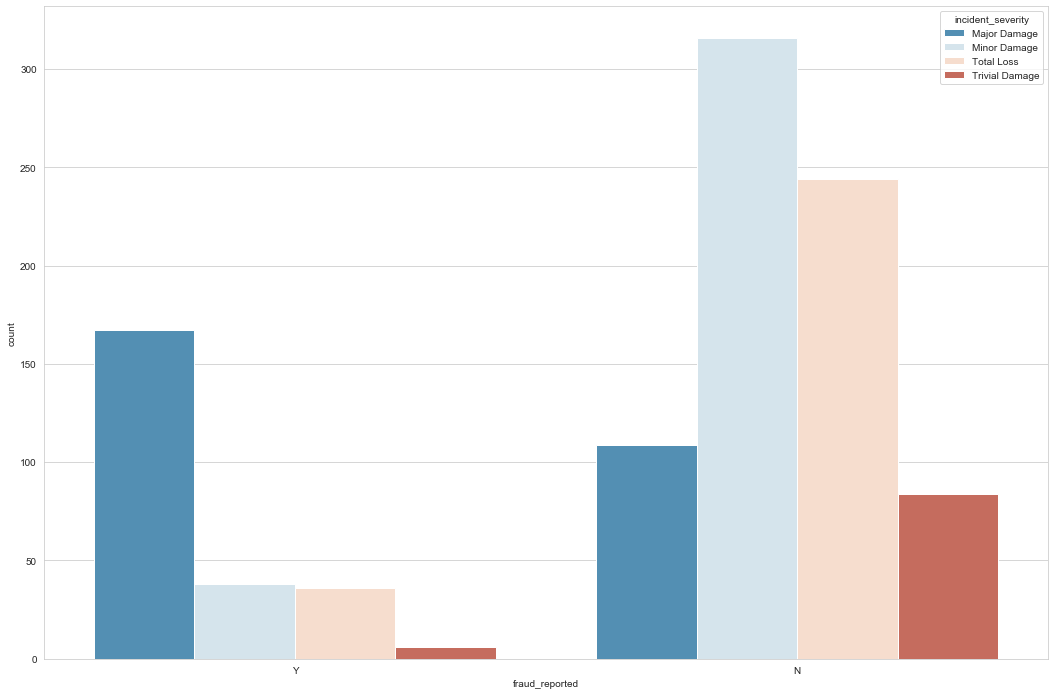

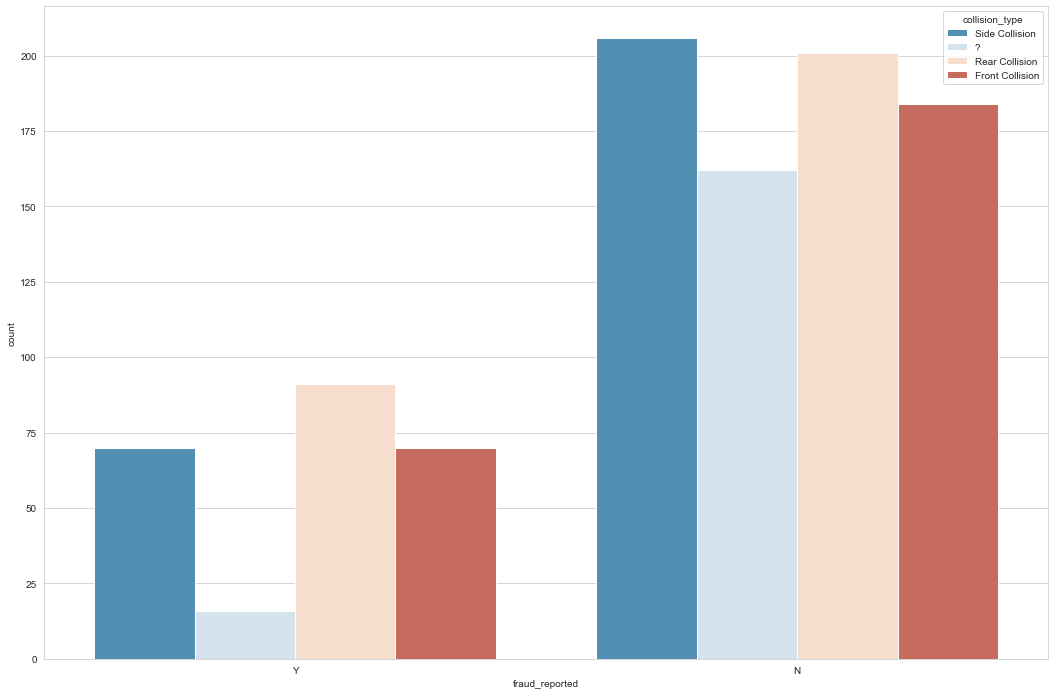

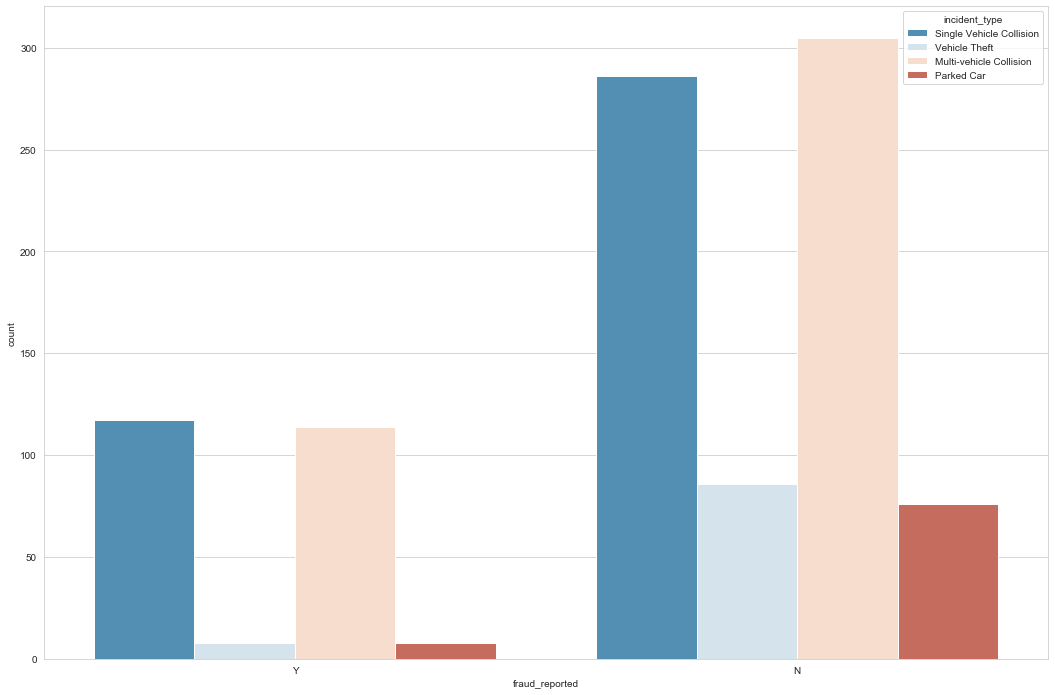

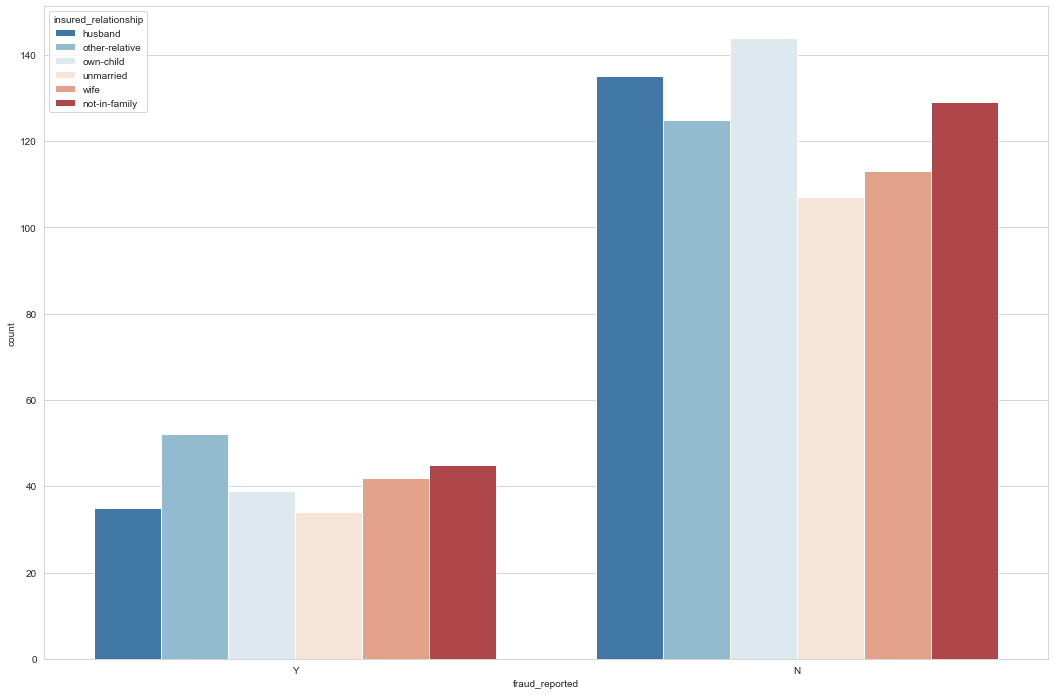

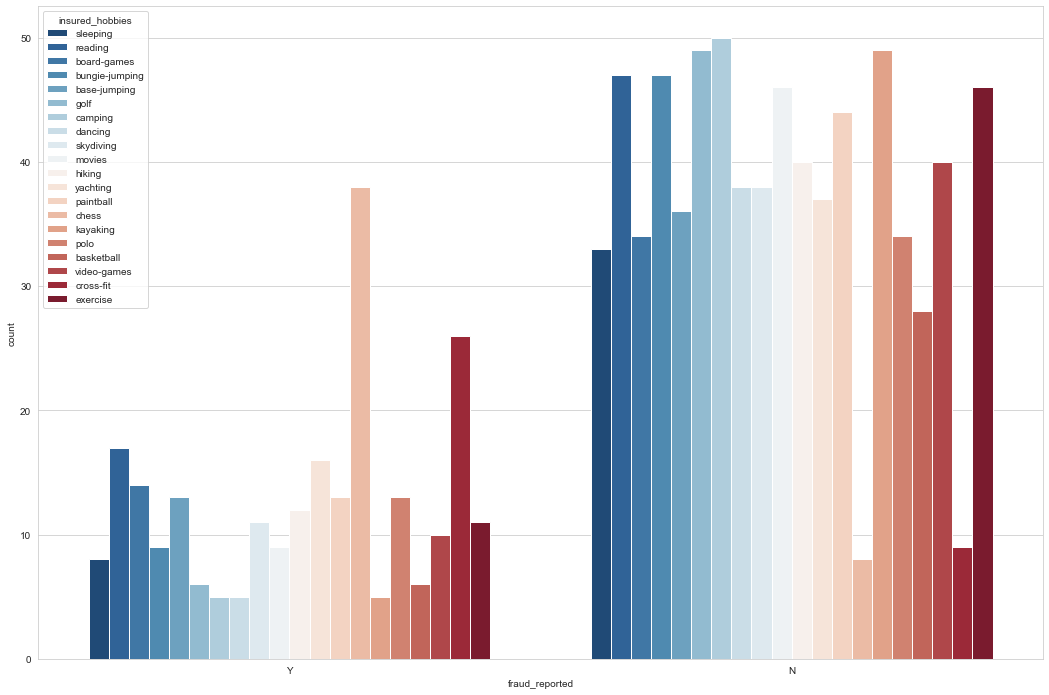

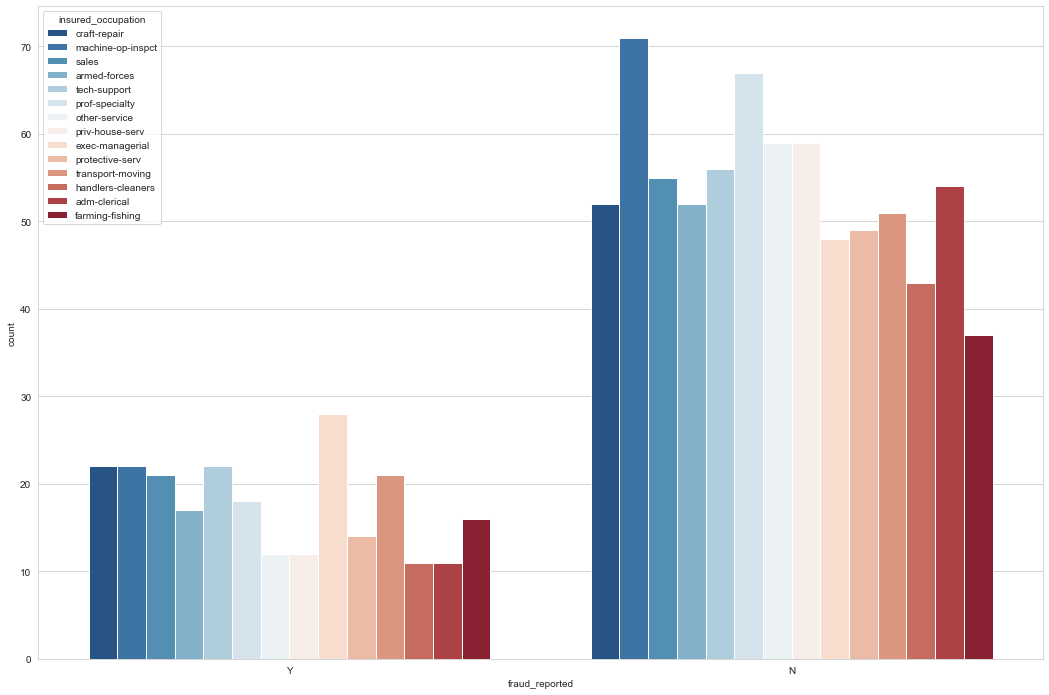

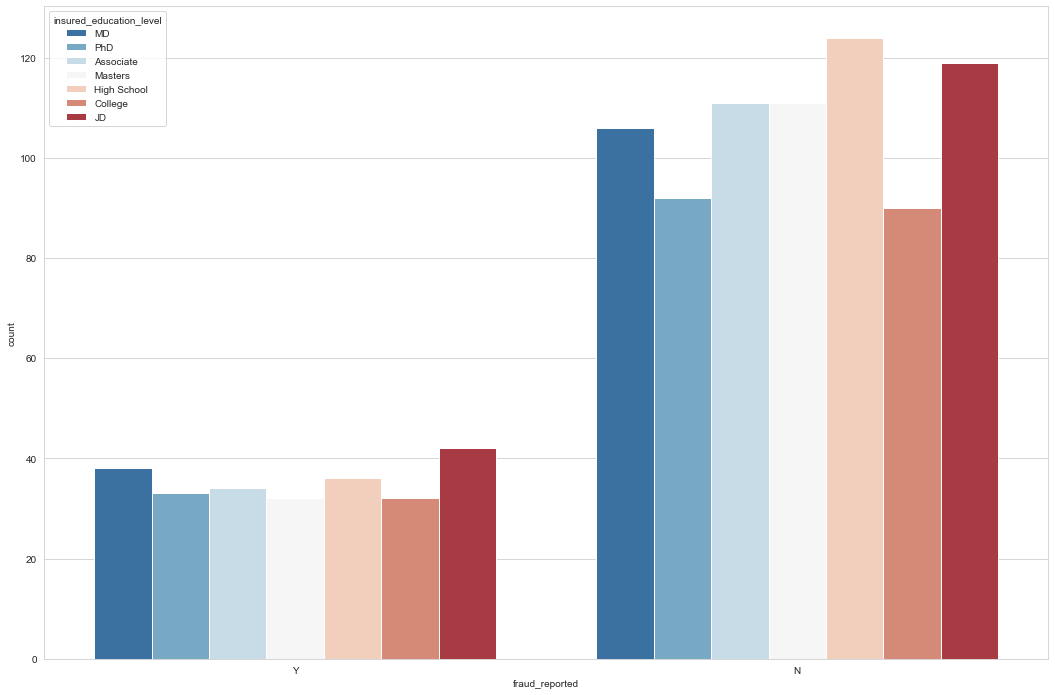

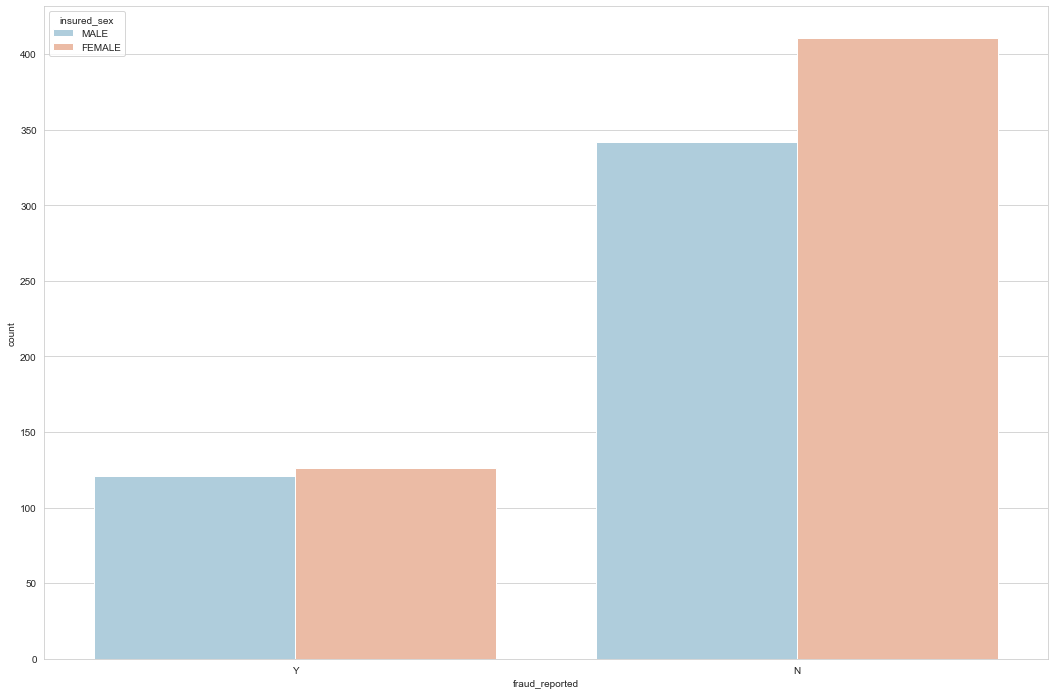

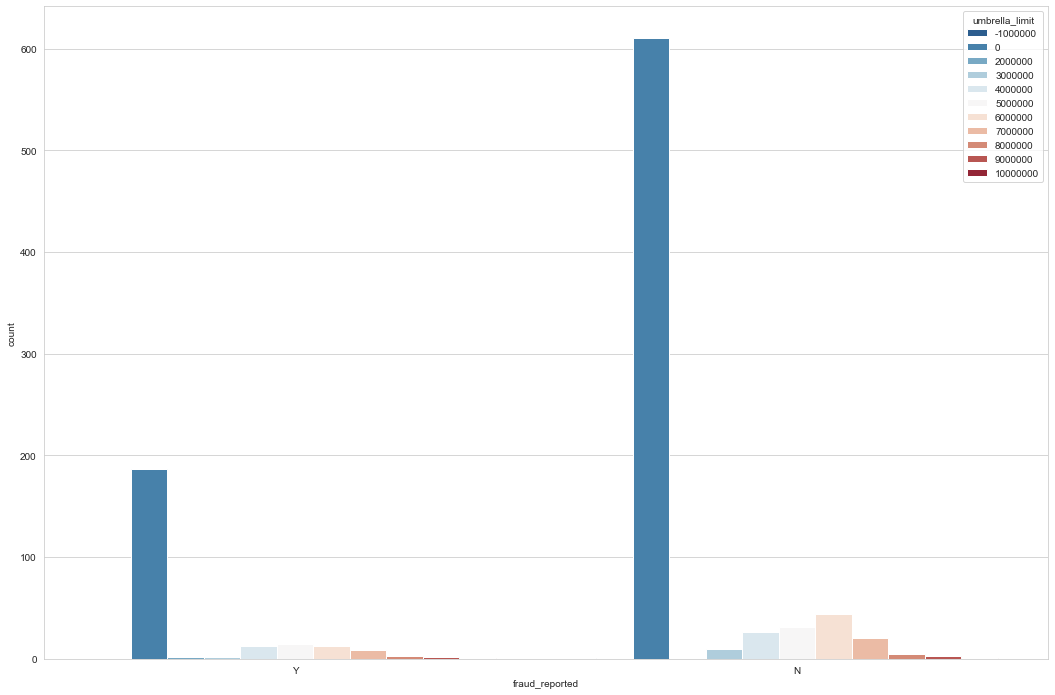

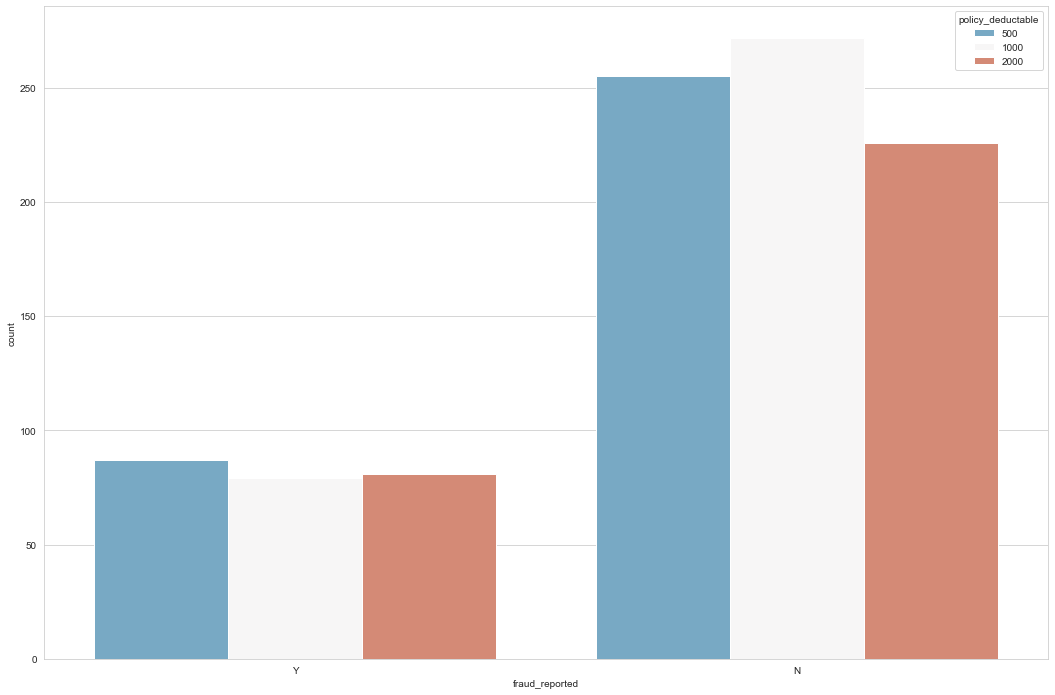

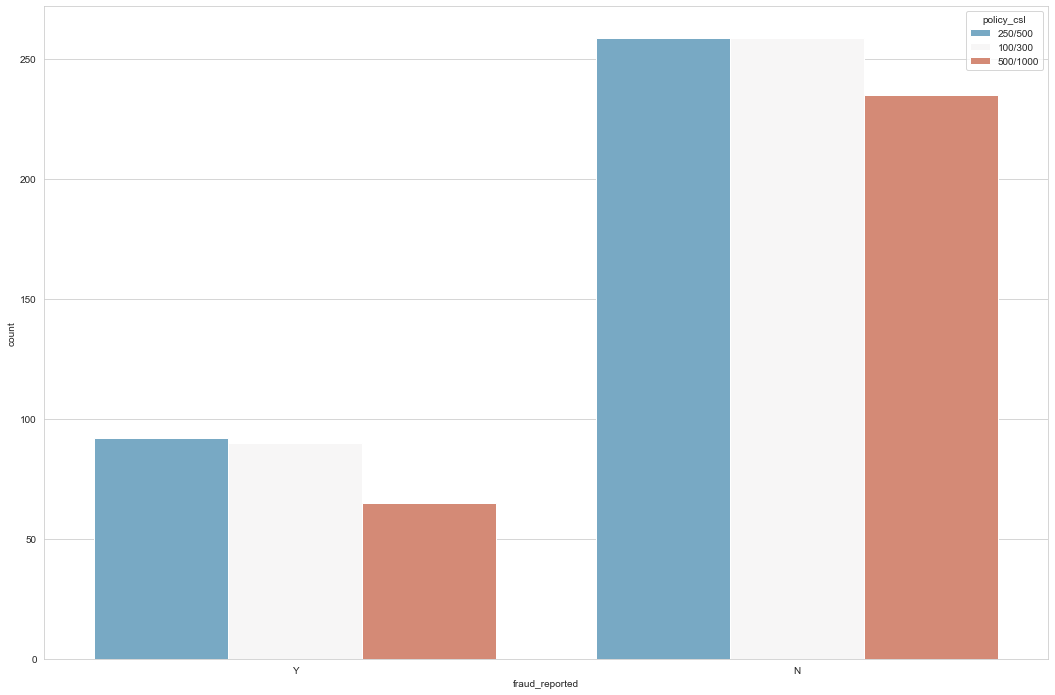

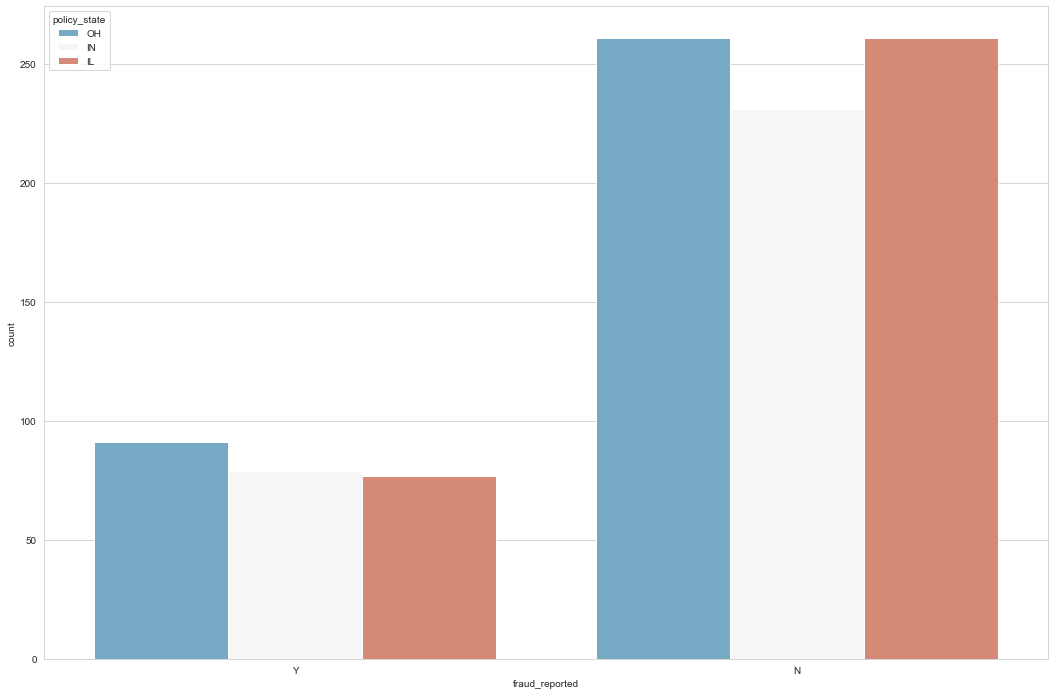

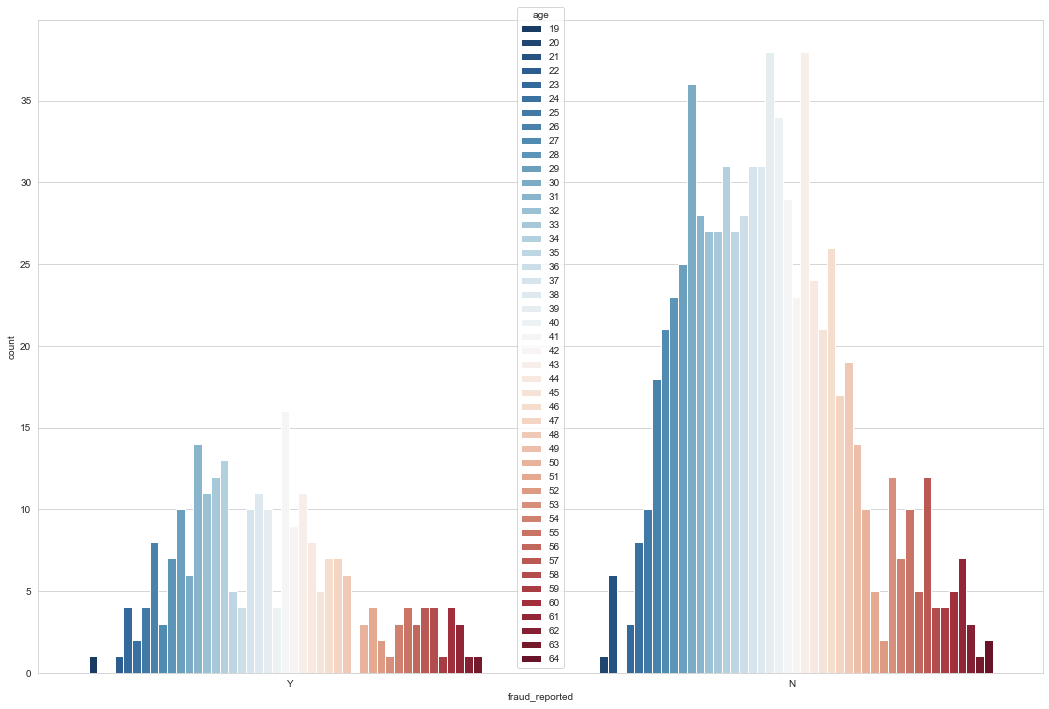

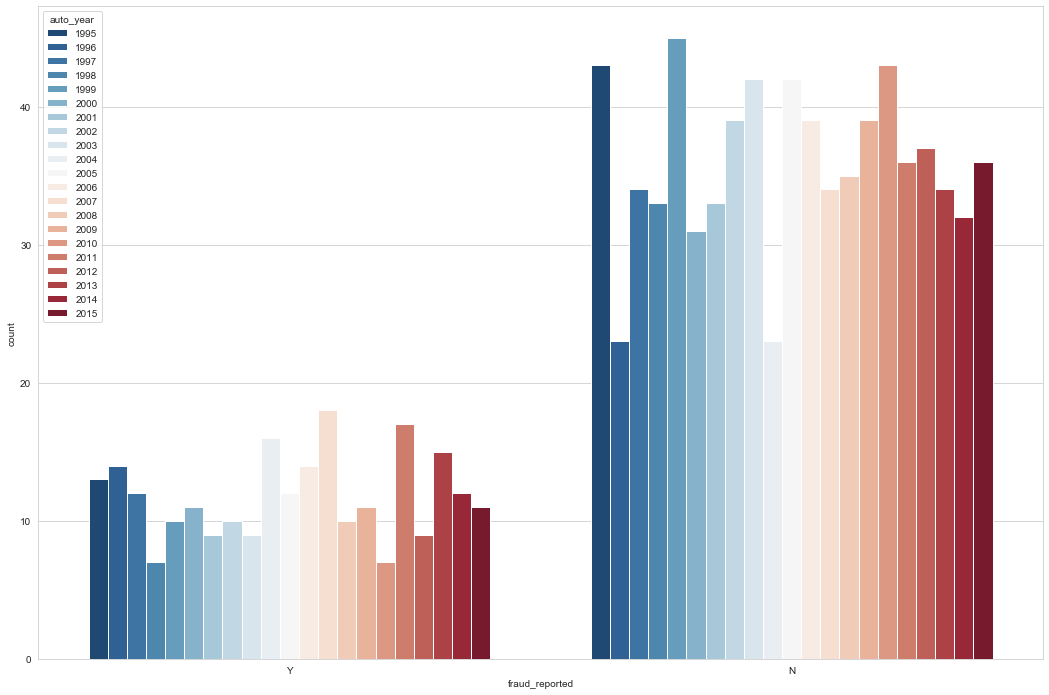

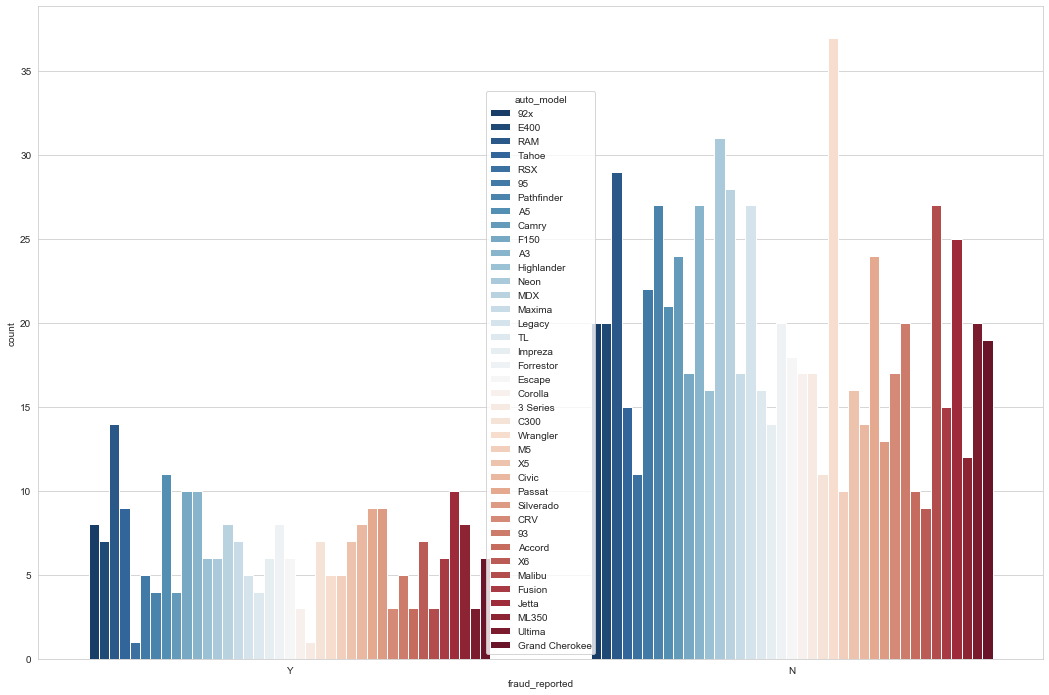

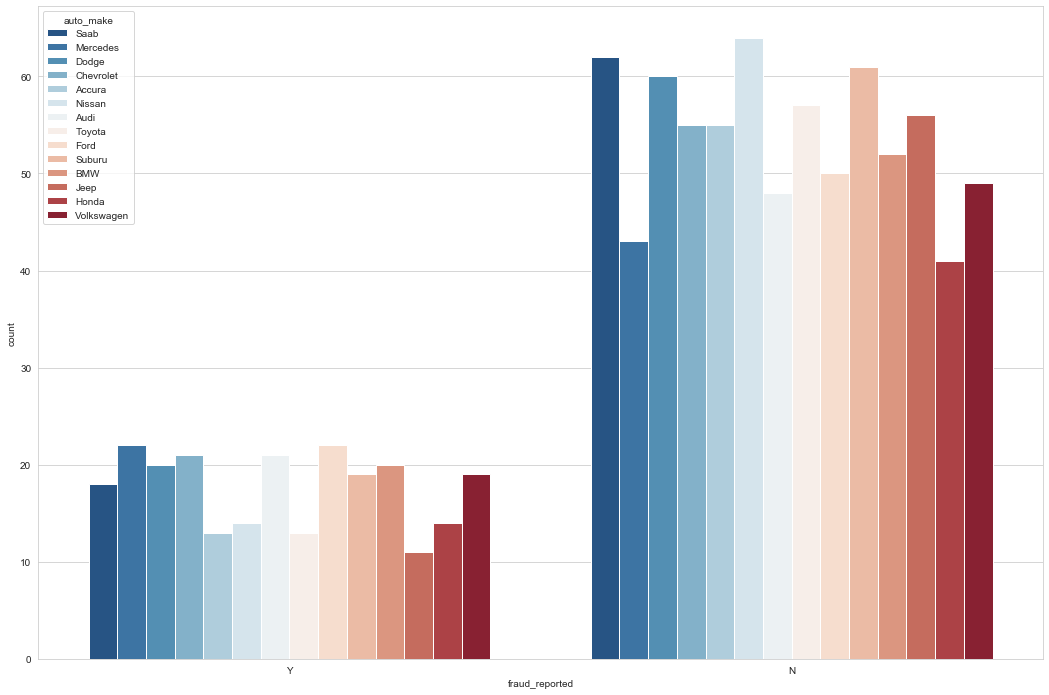

In [40]:
for i in df_count_plot_int_list:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.countplot(x='fraud_reported',hue=i,data=df,palette='RdBu_r')
    plt.show()   

from sklearn.preprocessing import LabelEncoder
for i in df_all_l:
    LE=LabelEncoder()
    print(df[i].value_counts().sort_index())
    df[i]=LE.fit_transform(df[i])
    print(df[i].value_counts().sort_index())

df_int_types

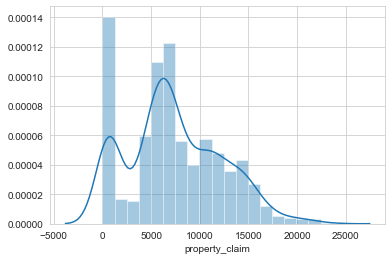

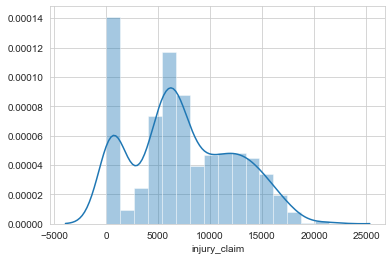

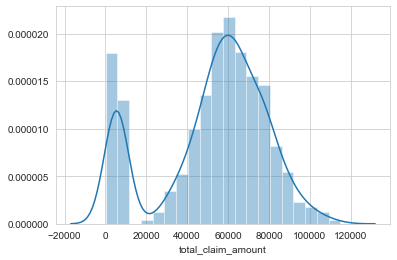

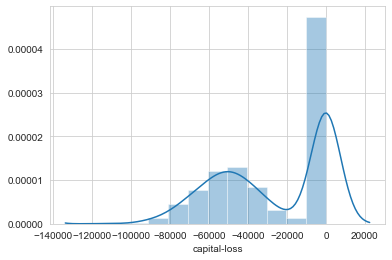

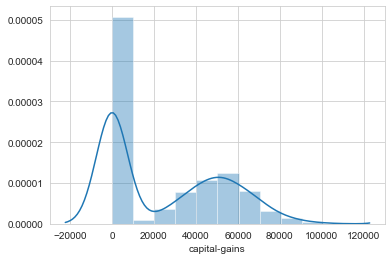

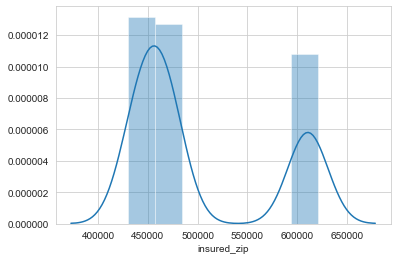

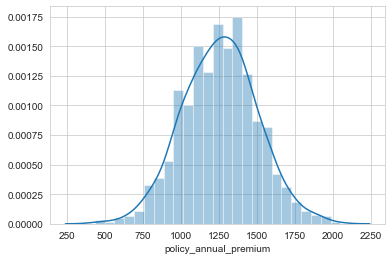

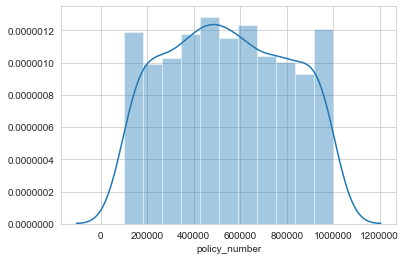

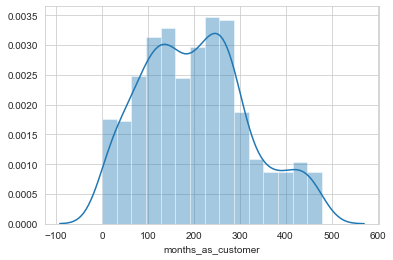

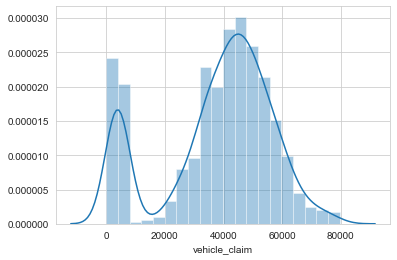

In [41]:
for i in df_dist_plot_int_list:
    sns.distplot(df[i])
    plt.show()